# Preamble

In [ ]:
# preamble

base_directory_str = '/content/gdrive/My Drive/bio_NN_research/bio-learning/my_article_codes'


import numpy as np
import torch

import matplotlib.pyplot as plt

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import pickle

from google.colab import drive


import numpy as np

import os

import time


import random

import shutil

!pip install import-ipynb
import import_ipynb


from datetime import datetime
from pytz import timezone    


drive.mount('/content/gdrive', force_remount=True)


if(os.path.isfile('/content/my_weight.ipynb')):
  os.remove('/content/my_weight.ipynb')


if(os.path.isfile('/content/my_coding.ipynb')):
  os.remove('/content/my_coding.ipynb')

if(os.path.isfile('/content/my_dataset.ipynb')):
  os.remove('/content/my_dataset.ipynb')
  

  

shutil.copy ( base_directory_str + '/my_modules/my_coding.ipynb'  , '/content/' )    

import my_coding


shutil.copy (  base_directory_str + '/my_modules/my_weight.ipynb'  , '/content/'  )    

import my_weight
# my_weight.dtype = torch.float32






shutil.copy ( base_directory_str + '/my_modules/my_dataset.ipynb'  , '/content/' )    

import my_dataset




if(os.path.isfile('/content/my_signal_processing.ipynb')):
  os.remove('/content/my_signal_processing.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_signal_processing.ipynb'  , '/content/' )    

import my_signal_processing



if(os.path.isfile('/content/my_model.ipynb')):
  os.remove('/content/my_model.ipynb')
  

shutil.copy (  base_directory_str + '/my_modules/my_model.ipynb'  , '/content/' )    

import my_model




base_directory_data_str =  base_directory_str + '/data/figure6_7_S2_data/'
base_directory_figure_str =  base_directory_str + '/figures/figure6_7_S2/'



if not os.path.exists(  base_directory_data_str  ):
    os.makedirs( base_directory_data_str )
    print("data saving path did not exist and created")


if not os.path.exists(  base_directory_figure_str  ):
    os.makedirs( base_directory_figure_str )
    print("figure saving path did not exist and created")

dtype = torch.float
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
plt.rcParams["mathtext.default"]= 'regular'
plt_fontsize_label_ = 30
plt_fontsize_legend_ = 27


my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]


  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-cp37-none-any.whl size=2976 sha256=5b8ddc9e257907c4084a1850b24d86db66a8ca690f31e5d047be3334bf3db5ed
  Stored in directory: /root/.cache/pip/wheels/b4/7b/e9/a3a6e496115dffdb4e3085d0ae39ffe8a814eacc44bbf494b5
Successfully built import-ipynb
Mounted at /content/gdrive
importing Jupyter notebook from my_coding.ipynb
importing Jupyter notebook from my_weight.ipynb
importing Jupyter notebook from my_dataset.ipynb
importing Jupyter notebook from my_signal_processing.ipynb
importing Jupyter notebook from my_model.ipynb
cuda


# Load MNIST

In [ ]:
# str_dir_data_mnist = "/content/gdrive/MyDrive/bio_NN_research/mnist_data/"

# str_dir_data_mnist22 = base_directory_str + "/mnist_data/"

# def copytree(src, dst, symlinks=False, ignore=None):
#     for item in os.listdir(src):
#         s = os.path.join(src, item)
#         d = os.path.join(dst, item)
#         if os.path.isdir(s):
#             shutil.copytree(s, d, symlinks, ignore)
#         else:
#             shutil.copy2(s, d)

# copytree(str_dir_data_mnist , str_dir_data_mnist22 )




In [ ]:
batch_size = 1000




str_dir_data_mnist = base_directory_str + "/mnist_data/"

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)
copytree(str_dir_data_mnist , "/content/mnist_data" )



train_loader50 , test_loader50 , code_map50 , x_shape50   =   my_dataset.get_MNIST_dataset(  coding_layers = [50]  , ones_in_layes = [ 5 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15  )

train_loader100 , test_loader100 , code_map100 , x_shape100 =   my_dataset.get_MNIST_dataset(  coding_layers = [100]  , ones_in_layes = [ 10 ]   , batch_size=batch_size , device = device  , flatten = True  , size=15  )




Using downloaded and verified file: ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw

Using downloaded and verified file: ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# One run function

In [ ]:


def one_run_function2(str_dir_data_BASE , train_loader  , test_loader , code_map
            , bias = False
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True  
            , skip_existing = False
           ):

  
  N_hidden = len(code_map[0][0])

  N_epoch = 100

  N_hidden_layers = 4

  N_input = 225

  N_output = N_hidden

  persistence = 1


  layers_info = []
  layers_info.append(N_input)

  for i in range(N_hidden_layers):
    layers_info.append(N_hidden+1+i)

  layers_info.append(N_output)

  print(layers_info)


  net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
  net.set_learning_rate(lr)

  if FA_method : str_direction_disc = "FA(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"
  else:  str_direction_disc = "BP(W_" + str(N_hidden) + "_lr_" + str(lr).replace('.', 'd') +")"


  if Normalize_Column_W_ != None and type(Normalize_Column_W_) == list  :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_[0] ).replace('.', 'd')+ "_" + str( Normalize_Column_W_[1] ).replace('.', 'd') + ")"
  elif Normalize_Column_W_ != None and  ( type(Normalize_Column_W_) == float or type(Normalize_Column_W_) == int  ) :
    str_direction_disc = str_direction_disc + "(CWN_" + str( Normalize_Column_W_ ).replace('.', 'd') + ")"
    Normalize_Column_W_ = [Normalize_Column_W_,Normalize_Column_W_]




  
  elif Normalize_whole_W_ != None and  type(Normalize_whole_W_) != list :
    str_direction_disc = str_direction_disc + "(WWN_" + str( Normalize_whole_W_ ).replace('.', 'd')  + ")"
  elif Normalize_whole_W_ == None and Normalize_Column_W_ == None :
    str_direction_disc = str_direction_disc + "(NoWN)"
  else: raise Exception("no defined condition")  


  if initial_B_normalization == True:
    str_direction_disc = str_direction_disc + "(IBN)"

  else:
    str_direction_disc = str_direction_disc + "(NoIBN)"



  if (B_Norm_Match_During  == True)  :
    str_direction_disc = str_direction_disc + "(DBNM)"
  elif (B_Norm_Match_During  == False) :
    str_direction_disc = str_direction_disc + "(NoBNM)"
  else: raise Exception("no defined condition")  

  if bias == True :
      str_direction_disc = str_direction_disc + "(Bias)"
  else:
    str_direction_disc = str_direction_disc + "(NoBias)"

  
  if save_details == True :
      str_direction_disc = str_direction_disc + "(Detailed)"


  if label_smoothing != None : 
    str_direction_disc = str_direction_disc + "(LS_"+ str(label_smoothing[0]).replace('.', 'd')  + "_" + str(label_smoothing[1]).replace('.', 'd') + ")"


  print(str_direction_disc)
  str_t = str_direction_disc

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"

  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  if not os.path.exists(str_dir_data_BASE_exp):
      os.makedirs(str_dir_data_BASE_exp)
  else:
    print("##############  path exist #################\n\n######################")
    if os.path.isfile(str_dir_data_BASE_exp + "/test_accuracy_list_repeat.txt") and skip_existing==True:
      print("############## file exist #################\n\n######################\n")

      return str_t

  text_file = open( str_dir_data_BASE_exp + "description.txt" , "w")

  text_file.write(str_direction_disc)




  N_layers = len(layers_info)-1
  L_N_layers = N_layers
  print(N_layers)

  N_signals = 20

  choose_list_x = [ 0 , 150 , 200 , 99 , 20 , 70 , 135 ,  66  , 43 , 180 , 110 , 111 , 112 , 88 , 32 , 2 , 224 , 220 , 201 , 202]
  choose_list_e = [ 0 , 2 , 3 , 8 , 10 ,11,13 , 14 , 17 , 22 , 23 , 25 , 28 , 33 , 34 ,38 , 41 , 42 , 45 ,49]
  choose_list_BATCH = [ 0 , 1 , 100 , 200 , 205 , 300 , 301 , 510,  666  , 777 , 959 , 1 , 1 , 1 ,1 , 1 , 1 , 55 ,700,501]


  E_signals =  torch.zeros( [ L_N_layers+1 , N_signals  , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  delta_signals =  torch.zeros( [L_N_layers+1  ,  N_signals  , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  L_signals =  torch.zeros( [L_N_layers+1  , N_signals  , N_repeat , N_epoch*len(train_loader)*persistence ]  )


  angle_W_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dBiad_BP_FA = torch.zeros( [N_layers + 1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  angle_dW_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  angle_dW_BP_FA = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )


  if save_details == True :
    #########################################################################################################
    angle_T_align_60_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
    angle_T_align_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
    angle_T_supalign_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

    angle_sum_T_align_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
    angle_sum_T_align_60_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
    angle_sum_T_supalign_B = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

    angle_T_align_plus_T_supalign_dW = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

    max_diff_T_align_plus_T_supalign_dW = torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )


    #########################################################################################################



    #########################################################################################################

    T_align_norms= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
    T_supalign_norms= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )



    #############################################
    

  p_saturated_fprime = torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )
  p_zero_fprime = torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )

  p_zero_delta_BP = torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )
  p_zero_delta_FA = torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )

  weight_norms= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  dW_norms= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  dW_norms_BP= torch.zeros( [N_layers , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  delta_norms_FA= torch.zeros( [N_layers+1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )
  delta_norms_BP= torch.zeros( [N_layers+1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )

  E_norms_FA= torch.zeros( [N_layers +1, N_repeat , N_epoch*len(train_loader)*persistence ]  )
  E_norms_BP= torch.zeros( [N_layers +1 , N_repeat , N_epoch*len(train_loader)*persistence ]  )



  change = 0

  test_accuracy_list_repeat = []

  for rep in range(N_repeat):
    test_accuracy_list=[]
    counter = 0 
    print(rep)
    
    text_file.write(str(rep)+'\n')
    
    if save_details == True :
      delta_list_k_l = []
      delta_BP_list_k_l = []
      E_list_k_l = []
      L_list_k_l = []
      Z_list_k_l = []
      W_list_k_l = []



      sum_alignment_term = []
      sum_alignment_term_60 = []
      sum_supalignment_term = []
      for l in range(N_layers):
        sum_alignment_term .append(torch.zeros_like(net.W[l])  )
        sum_alignment_term_60 .append(torch.zeros_like(net.W[l])  )
        sum_supalignment_term   .append(torch.zeros_like(net.W[l])  )
      



    net = my_model.my_network1(layers_info, bias=bias ,initial_mean=0 , initial_var = 0.1)
    # print(net.bias_vec[-1])
    net.set_learning_rate(lr)

    
    
    if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list:  
      net.seed_norms(Normalize_Column_W_[0],Normalize_Column_W_[1])
      net.column_normalize_W()
      if initial_B_normalization == True: net.column_normalize_B()

    elif Normalize_whole_W_!=None:
      net.normalize_W(Normalize_whole_W_)  
      if initial_B_normalization == True: net.normalize_B(Normalize_whole_W_)  



    for epoch_i in range(N_epoch):
      ########################################################## TEST
      with torch.no_grad():

        acc=0
        ntotal = 0
        for (x_in, y_n) in test_loader:
          x_in = x_in.to(device)
          y_n =  y_n.to(device)
          net_last_layers = net.forward(x_in)
          acc = acc + y_n.shape[0]*my_coding.get_accuracy( y_n , code_map , [net_last_layers] , top=1 , coef=None ) 
          ntotal = ntotal + y_n.shape[0]

        acc = acc / ntotal

      test_accuracy_list. append(acc*100)

      if ( epoch_i%10 == 0 ):
        print("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)  )
        text_file.write("epoch: " + str(epoch_i)  +  ",test_accu2: " + str(acc)+'\n')
      
      # if (epoch_i > 1) and ( epoch_i % 2 == 0 ) :
      #   print("\n \n epoch: " + str(epoch_i)   )

      #   print('alignment_term.norm()')
      #   print(alignment_term.norm())

      #   print('sub_alignment_term.norm()')
      #   print(sub_alignment_term.norm())

      #   print('alignment_term_60.norm()')
      #   print(alignment_term_60.norm())

        # print('alignment_term_60.norm()')
        # print(alignment_term_60.norm())

      ################################################################################### TEST


      for iter , (x_in, y_n) in enumerate( train_loader ):

        x_in = x_in.to(device)
        if label_smoothing != None : y_n =  y_n.to(device)*label_smoothing[0] + label_smoothing[1]
        else : y_n =  y_n.to(device)

      
        for persist_i in range(persistence):

          if save_details == True :
            for k in range(1,N_layers+1):
              p_saturated_fprime[  k  ,  rep  ,  counter ] = ( (  1*(net.Z[k]>1.2))!=0 ).sum() / net.Z[k].shape[0] / net.Z[k].shape[1]
              p_zero_fprime[  k  ,  rep  ,  counter ] = (net.Z[k]<=0 ).sum() / net.Z[k].shape[0] / net.Z[k].shape[1]


          for k in range(N_layers):
            angle_W_B[  k  ,  rep  ,  counter ] = my_weight.angle( net.W[k] , net.B[k].t()  )  
          

             
          for k in range(N_layers):
            weight_norms[  k  ,  rep  ,  counter  ] =  net.W[k] .norm()

          L_f = net.forward(x_in)


          E = y_n - L_f


          Delta_bp  , Delta_bias_bp = net.backprop(E)  ################################################################################### BP
          
          if save_details == True :
            delta_BP_l = [] 
            delta_BP_l.append(None)
            for l in range(1,N_layers+1):
              delta_BP_l.append(net.delta_BP[l].clone())


          if save_details == True :
            for k in range(1,N_layers+1):
              p_zero_delta_BP[  k  ,  rep  ,  counter ] = ( (  1*(net.delta_BP[k] < 0))!=0 ).sum() / net.delta_BP[k].shape[0] / net.delta_BP[k].shape[1]
  
          
            for l in range(1,N_layers+1):
              delta_norms_BP[  l  ,  rep  ,  counter ]  = net.delta_BP[l].norm()
              E_norms_BP[  l  ,  rep  ,  counter ]  = net.E_BP[l].norm()

          Delta_fa , Delta_bias_fa = net.BP_TRW(E) ########################################################################################## FA
          

          if save_details == True :
            for k in range(1,N_layers+1):
              p_zero_delta_FA[  k  ,  rep  ,  counter ] = ( (  1*(net.delta_FA[k] < 0))!=0 ).sum() / net.delta_FA[k].shape[0] / net.delta_FA[k].shape[1]


          for k in range(N_layers):
            angle_dW_B[  k  ,  rep  ,  counter ] = my_weight.angle( Delta_fa[k] , net.B[k].t()  )  


          if FA_method:
  
              net.step_W(Delta_fa) ############################################################################################# STEP FA
              if bias==True :
                net.step_bias(Delta_bias_fa)

          else:
 
              net.step_W(Delta_bp) ############################################################################################# STEP BP
              if bias==True :
                net.step_bias(Delta_bias_bp)

          for l in range(1,N_layers+1):
            delta_norms_FA[  l  ,  rep  ,  counter ]  = net.delta_FA[l].norm()
            E_norms_FA[  l  ,  rep  ,  counter ]  = net.E_FA[l].norm()



          
          if Normalize_Column_W_!=None and type(Normalize_Column_W_) == list :  net.column_normalize_W()
          elif Normalize_whole_W_!=None:  net.normalize_W(Normalize_whole_W_)


          if B_Norm_Match_During : net.match_B_norm_to_W_norm()

          for l in range(N_layers):
            angle_dW_BP_FA[  l  ,  rep  ,  counter   ] = my_weight.angle( Delta_bp[l] , Delta_fa[l]  )  

          for l in range(1,N_layers+1):
            angle_dBiad_BP_FA[  l  ,  rep  ,  counter   ] = my_weight.angle( Delta_bias_bp[l] , Delta_bias_fa[l]  )    
            

          if save_details == True :
    
            for l in range(N_layers):
              dW_norms[  l  ,  rep  ,  counter   ] = lr*Delta_fa[l].norm()
              dW_norms_BP[  l  ,  rep  ,  counter   ] = lr*Delta_bp[l].norm()


            delta_l = []
            E_l = []
            L_l = []
            Z_l = []

            for l in range(L_N_layers+1):
              L_l .append(net.L[l].clone())

            delta_l.append(None)
            E_l.append(None)
            Z_l.append(None)

            for l in range(1,N_layers+1):
              delta_l.append(net.delta_FA[l].clone())
              E_l.append(net.E_FA[l].clone())
              Z_l .append(net.Z[l].clone())



            delta_list_k_l . append(  delta_l  )
            delta_BP_list_k_l.append(  delta_BP_l  )
            E_list_k_l . append(  E_l   )
            L_list_k_l . append(  L_l  )
            Z_list_k_l . append(  Z_l   )

  

            if (  len(Z_list_k_l) > 3 ) :
              # T_{l,align} ,  T_{l,supalign}
              
     
              for l in range(1,L_N_layers):
                if (  len(Z_list_k_l) > 62 ) :
                  # T_{l,align,60} 
                  # print(net.bias_vec[l].shape)
                  temp1 = torch.matmul (  W_list_k_l[-61][l-1].t()  ,  L_list_k_l[-1][l-1].t() )  + net.bias_vec[l].t()
                  temp1 =  net.derivative_activation1( temp1 )  

                  temp2 = torch.matmul( delta_list_k_l[-61][l+1]  , net.B[l] )
                  temp3 =  net.derivative_activation1( Z_list_k_l[-61][l] )  
                  temp2 = torch.mul(temp2 , temp3)
                  temp4 = torch.matmul (    torch.matmul (  temp2 .t() , L_list_k_l[-61][l-1]  )  ,  L_list_k_l[-1][l-1] .t()   )
                  temp4 = torch.mul( temp1  , temp4   )
                  temp4 = lr*lr*torch.matmul (  temp4  ,  delta_list_k_l[-1][l+1]  )
                  alignment_term_60 = temp4
          
                  angle_T_align_60_B[l , rep ,  counter ] = my_weight.angle(   alignment_term_60   , net.B[l].t()   )
                  sum_alignment_term_60[l] = sum_alignment_term_60[l] + alignment_term_60
                  angle_sum_T_align_60_B[l , rep ,  counter   ] = my_weight.angle(   sum_alignment_term_60[l]   , net.B[l].t()   )

                # T_{l,align} 
                  # print(net.bias_vec[l].shape)

                temp1 = torch.matmul (  W_list_k_l[-2][l-1].t()  ,  L_list_k_l[-1][l-1].t() )  + net.bias_vec[l].t()
                temp1 =  net.derivative_activation1( temp1 )  

                temp2 = torch.matmul( delta_list_k_l[-2][l+1]  , net.B[l] )
                temp3 =  net.derivative_activation1( Z_list_k_l[-2][l] )  
                temp2 = torch.mul(temp2 , temp3)
                temp4 = torch.matmul (    torch.matmul (  temp2 .t() , L_list_k_l[-2][l-1]  )  ,  L_list_k_l[-1][l-1] .t()   )
                temp4 = torch.mul( temp1  , temp4   )
                temp4 = lr*lr*torch.matmul (  temp4  ,  delta_list_k_l[-1][l+1]  )
                alignment_term = temp4
             

                #T_{l,supalign}
                temp11 = torch.matmul ( W_list_k_l[-2][l-1].t() , L_list_k_l[-1][l-1] .t() )  + net.bias_vec[l].t()
                temp11 = net.activation1 ( temp11  )
                temp11 = lr*torch.matmul (  temp11  ,  delta_list_k_l[-1][l+1]   )
                sub_alignment_term = temp11
                

                angle_T_align_B[l , rep ,  counter ] = my_weight.angle(   alignment_term   , net.B[l].t()   )
                


                angle_T_supalign_B[l , rep ,  counter ]  =  my_weight.angle(  sub_alignment_term  ,  net.B[l].t()   )
                angle_T_align_plus_T_supalign_dW[l , rep ,  counter ]  =  my_weight.angle(  sub_alignment_term +  alignment_term ,  Delta_fa[l]   )

                max_diff_T_align_plus_T_supalign_dW[l , rep ,  counter ]  = (  sub_alignment_term -  alignment_term   ).max()

                sum_alignment_term[l] = sum_alignment_term[l] + alignment_term 
                

          
                sum_supalignment_term[l] = sum_supalignment_term[l] + sub_alignment_term

                angle_sum_T_align_B[l , rep ,  counter   ] = my_weight.angle(   sum_alignment_term[l]   , net.B[l].t()   )
                

                angle_sum_T_supalign_B[l , rep ,  counter   ]  =  my_weight.angle(  sum_supalignment_term[l]  ,  net.B[l].t()   )
                
                T_align_norms[ l ,  rep  ,  counter  ] = alignment_term.norm() 
                T_supalign_norms[  l  ,  rep  ,  counter  ] = sub_alignment_term.norm()
                

          
         

                  
            if len( W_list_k_l ) > 65 :
              delta_list_k_l.pop(0)
              L_list_k_l.pop(0)
              Z_list_k_l.pop(0)
              W_list_k_l.pop(0)

            if len( W_list_k_l ) > 4 :
              delta_BP_list_k_l.pop(0)
              E_list_k_l.pop(0)


          



            W_l = []
            for l in range(L_N_layers):
              # print(net.W[l].clone().shape)
              # W_1 .append(  net.W[l].clone()  )
              W_l .append(  net.W[l].clone()  )

              
            W_list_k_l . append(  W_l   )

          
          if save_details == True :
            for l in range(1,L_N_layers+1):
              for k in range(N_signals):
                E_signals[ l , k  ,  rep  ,  counter ] = net.E_FA[l] [  choose_list_BATCH[k] , choose_list_e[k]   ]
                delta_signals[ l , k  ,  rep  ,  counter ] = net.delta_FA[l] [  choose_list_BATCH[k] , choose_list_e[k]   ]
                L_signals[ l , k  ,  rep  ,  counter ] = net.L[l] [  choose_list_BATCH[k] , choose_list_e[k]   ]

            
            for k in range(N_signals):
              L_signals[ 0 , k  ,  rep  ,  counter ] = net.L[0] [  choose_list_BATCH[k] , choose_list_x[k]   ]

          counter = counter+1
    test_accuracy_list_repeat . append( test_accuracy_list )


  if save_details == True :
  

    FROM = 8
    for l in range(angle_sum_T_supalign_B.shape[0]):
      for R in range(angle_sum_T_supalign_B.shape[1]):
        for I in range(FROM):
         

          angle_sum_T_supalign_B[l,R][I] = angle_sum_T_supalign_B[l,R][FROM]
          angle_sum_T_align_B[l,R][I] = angle_sum_T_align_B[l,R][FROM]
          angle_T_align_plus_T_supalign_dW[l,R][I] = angle_T_align_plus_T_supalign_dW[l,R][FROM]           
          angle_T_supalign_B[l,R][I] = angle_T_supalign_B[l,R][FROM]
          angle_T_align_B[l,R][I] = angle_T_align_B[l,R][FROM]
         
   
          T_supalign_norms[l,R][I] = T_supalign_norms[l,R][FROM]
          T_align_norms[l,R][I] = T_align_norms[l,R][FROM]


          
  test_accuracy_list_repeat = torch.tensor(test_accuracy_list_repeat)



  str_dir_data_BASE_exp =  str_dir_data_BASE  + str_direction_disc + "/"
  # if not os.path.exists(str_dir_data_BASE_exp):
  #     os.makedirs(str_dir_data_BASE_exp)



  str_direction = str_dir_data_BASE_exp + "test_accuracy_list_repeat" + ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( test_accuracy_list_repeat  , fp)


  if save_details == True :



    str_direction = str_dir_data_BASE_exp + "angle_sum_T_supalign_B" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_sum_T_supalign_B  , fp)




    str_direction = str_dir_data_BASE_exp + "angle_sum_T_align_B" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_sum_T_align_B  , fp)



    str_direction = str_dir_data_BASE_exp + "angle_T_align_plus_T_supalign_dW"+ ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_T_align_plus_T_supalign_dW  , fp)



    str_direction = str_dir_data_BASE_exp + "max_diff_T_align_plus_T_supalign_dW"+ ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( max_diff_T_align_plus_T_supalign_dW  , fp)



    str_direction = str_dir_data_BASE_exp + "angle_T_supalign_B" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_T_supalign_B  , fp)



    str_direction = str_dir_data_BASE_exp + "angle_T_align_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_T_align_B  , fp)

    str_direction = str_dir_data_BASE_exp + "angle_T_align_60_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_T_align_60_B  , fp)

    str_direction = str_dir_data_BASE_exp + "angle_sum_T_align_60_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_sum_T_align_60_B  , fp)

  
  ####################### signals
  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "E_signals" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( E_signals  , fp)

    str_direction = str_dir_data_BASE_exp + "delta_signals" + ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( delta_signals  , fp)


    str_direction = str_dir_data_BASE_exp + "L_signals" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( L_signals  , fp)


  ######################################

  ####################### saturation 


  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "p_zero_delta_BP" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( p_zero_delta_BP  , fp)    

    str_direction = str_dir_data_BASE_exp + "p_zero_delta_FA" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( p_zero_delta_FA  , fp)    



    str_direction = str_dir_data_BASE_exp + "p_zero_fprime" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( p_zero_fprime  , fp)    

    str_direction = str_dir_data_BASE_exp + "p_saturated_fprime" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( p_saturated_fprime  , fp)    

  ####################### W  B 
  str_direction = str_dir_data_BASE_exp + "angle_W_B" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_W_B  , fp) 


  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "angle_dW_B" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( angle_dW_B  , fp)    



  ####################### Delta W    FA , BP
  str_direction = str_dir_data_BASE_exp + "angle_dW_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dW_BP_FA  , fp)    

  str_direction = str_dir_data_BASE_exp + "angle_dBiad_BP_FA" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( angle_dBiad_BP_FA  , fp)    


  ####################### Norms
  str_direction = str_dir_data_BASE_exp + "weight_norms" +  ".txt"
  with open( str_direction  , "wb") as fp:   #Pickling
    pickle.dump( weight_norms  , fp)    

  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "dW_norms" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( dW_norms  , fp)   

    str_direction = str_dir_data_BASE_exp + "dW_norms_BP" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( dW_norms_BP  , fp)  



  if save_details == True :
    str_direction = str_dir_data_BASE_exp + "T_align_norms" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( T_align_norms  , fp)    

    str_direction = str_dir_data_BASE_exp + "T_supalign_norms" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( T_supalign_norms  , fp)    




    str_direction = str_dir_data_BASE_exp + "delta_norms_FA" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( delta_norms_FA  , fp)  

    str_direction = str_dir_data_BASE_exp + "E_norms_FA" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( E_norms_FA  , fp)     

    str_direction = str_dir_data_BASE_exp + "E_norms_BP" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( E_norms_BP  , fp)  

    str_direction = str_dir_data_BASE_exp + "delta_norms_BP" +  ".txt"
    with open( str_direction  , "wb") as fp:   #Pickling
      pickle.dump( delta_norms_BP  , fp)     





  tehran_time = timezone('Asia/Tehran')
  sa_time = datetime.now(tehran_time)
  timestr = sa_time.strftime('%Y-%m-%d   %H-%M-%S')

  text_file.write(timestr+'\n')
  print("save")

  text_file.write("save")

  print (timestr)
  text_file.close()

  return net


# Run

## FA, width=50, No weight Normalization, No B norm matching

In [ ]:
one_run_function2(base_directory_data_str , train_loader50  , test_loader50 , code_map=code_map50
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 1
            , save_details = True
            , label_smoothing = None
            , FA_method=True

           )

In [ ]:
one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50 , code_map=code_map50
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True

           )

## FA, width=50, No weight Normalization, B norm matching

In [ ]:
one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50 , code_map=code_map50
            , bias = True
            , B_Norm_Match_During = True 
            , initial_B_normalization = False
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True

           )

## FA, width=50, column weight Normalization 1, B norm matching

In [ ]:
one_run_function2(base_directory_data_str , train_loader50  , test_loader50 , code_map=code_map50
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = [1,1]
            , lr = .0005
            , N_repeat = 1
            , save_details = True
            , label_smoothing = None
            , FA_method=True

           )

In [ ]:
one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50 , code_map=code_map50
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = [1,1]
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True

           )




## FA, width=50, whole weight Normalization 7.07, B norm matching

In [ ]:
one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50 , code_map=code_map50
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = 7.07
            , Normalize_Column_W_ = None
            , lr = .0005
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True

           )

## FA, width=100, No weight Normalization

In [ ]:
one_run_function2(base_directory_data_str ,  train_loader100  , test_loader100 , code_map=code_map100
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0003
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True

           )

## FA, width=100, column weight Normalization

In [ ]:
one_run_function2(base_directory_data_str ,  train_loader100  , test_loader100 , code_map=code_map100
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = [1,1]
            , lr = .0003
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=True

           )

## BP, width=50, weight Normalization 1

In [ ]:
one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50, code_map=code_map50
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = [0.6,0.6]
            , lr = .0003
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=False

           )

[225, 51, 52, 53, 54, 50]
BP(W_50_lr_0d0003)(CWN_0d6_0d6)(IBN)(NoBNM)(Bias)
##############  path exist #################

######################
5
0
epoch: 0,test_accu2: 0.09210000336170196
epoch: 10,test_accu2: 0.8562000393867493
epoch: 20,test_accu2: 0.8781000435352325
epoch: 30,test_accu2: 0.9152000486850739
epoch: 40,test_accu2: 0.9283000528812408
epoch: 50,test_accu2: 0.9314000546932221
epoch: 60,test_accu2: 0.9362000405788422
epoch: 70,test_accu2: 0.9399000406265259
epoch: 80,test_accu2: 0.9404000461101532
epoch: 90,test_accu2: 0.9398000478744507
1
epoch: 0,test_accu2: 0.10100000575184823
epoch: 10,test_accu2: 0.8637000441551208
epoch: 20,test_accu2: 0.9270000517368316
epoch: 30,test_accu2: 0.9379000425338745
epoch: 40,test_accu2: 0.9341000318527222
epoch: 50,test_accu2: 0.9441000461578369
epoch: 60,test_accu2: 0.9449000418186188
epoch: 70,test_accu2: 0.94560005068779
epoch: 80,test_accu2: 0.9486000418663025
epoch: 90,test_accu2: 0.9444000363349915
2
epoch: 0,test_accu2: 0.101000

## BP, width=50, No weight Normalization

In [ ]:
one_run_function2(base_directory_data_str ,    train_loader50  , test_loader50, code_map=code_map50
            , bias = True
            , B_Norm_Match_During = False 
            , initial_B_normalization = True
            , Normalize_whole_W_ = None
            , Normalize_Column_W_ = None
            , lr = .0003
            , N_repeat = 10
            , save_details = False
            , label_smoothing = None
            , FA_method=False

           )

# Plot figure 6 A,B

In [ ]:
y_axis_lim_W_B_angle = [65 , 95 , 5]






linestyle_1 =  (0, (2, 3))
linestyle_2 =  '-'


str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(WWN_7d07)(IBN)(NoBNM)(Bias)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_1 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_1= pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_1 = pickle.load(fp) 


str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1_1)(IBN)(NoBNM)(Bias)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_2 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_2 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_2 = pickle.load(fp) 

figsize_ = (5,5)

################################################################

N_layers = angle_W_B_1.shape[0]

N_repetition = angle_W_B_1.shape[1]

length = angle_W_B_1.shape[-1]

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]


plt.figure(num = None, figsize=figsize_, dpi=150, facecolor='w', edgecolor='k')


for i in range(1,N_layers):
  x = angle_W_B_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  plt.plot( x_mean  , linestyle = linestyle_1 , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  


for i in range(1,N_layers):
  x = angle_W_B_2[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  plt.plot( x_mean  ,  linestyle = linestyle_2  , dash_capstyle='round' ,label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  


plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$W_{\ell } \measuredangle B_{\ell }^T \ (degree)$", fontsize= plt_fontsize_label_)




plt.title("Width: 50"    , fontsize= plt_fontsize_label_   )




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.ylim(y_axis_lim_W_B_angle[0],y_axis_lim_W_B_angle[1])
plt.yticks(list(range(y_axis_lim_W_B_angle[0] , y_axis_lim_W_B_angle[1] , y_axis_lim_W_B_angle [2])))

plt.savefig( base_directory_figure_str +  'W_B_50_with_normalization.jpg' , dpi=300 , bbox_inches='tight') 


plt.show()





####################################################################################################################################################################################################
##################################################################################################





plt.figure(num = None, figsize=figsize_, dpi=150, facecolor='w', edgecolor='k')



for i in range(0,N_layers-1):
  x = angle_dW_BP_FA_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)
  
  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean  ,  linestyle = linestyle_1  , dash_capstyle='round' , label = r'$\Delta W_{' + str(i) +  ',FA} \measuredangle \Delta W_{'+ str(i) + ',BP}$'  , color = my_cycle[i] , linewidth=2  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(length)   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  





for i in range(0,N_layers-1):
  x = angle_dW_BP_FA_2[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean   ,  linestyle = linestyle_2  , dash_capstyle='round' , label = r'$\Delta W_{' + str(i) +  ',FA} \measuredangle \Delta W_{'+ str(i) + ',BP}$'  , color = my_cycle[i] , linewidth=2  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(length)   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  





plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$\Delta W_{\ell ,FA} \measuredangle \Delta W_{\ell ,BP} \ (degree)$", fontsize= plt_fontsize_label_)




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(20,95)
plt.yticks(list(range(20,95,10)))
plt.savefig( base_directory_figure_str +  'dw_FA_BP_50_with_normalization.jpg' , dpi=300 , bbox_inches='tight') 

plt.show()


####################################################################################################################################################################################################
##################################################################################################



# Plot figure 6 C,D

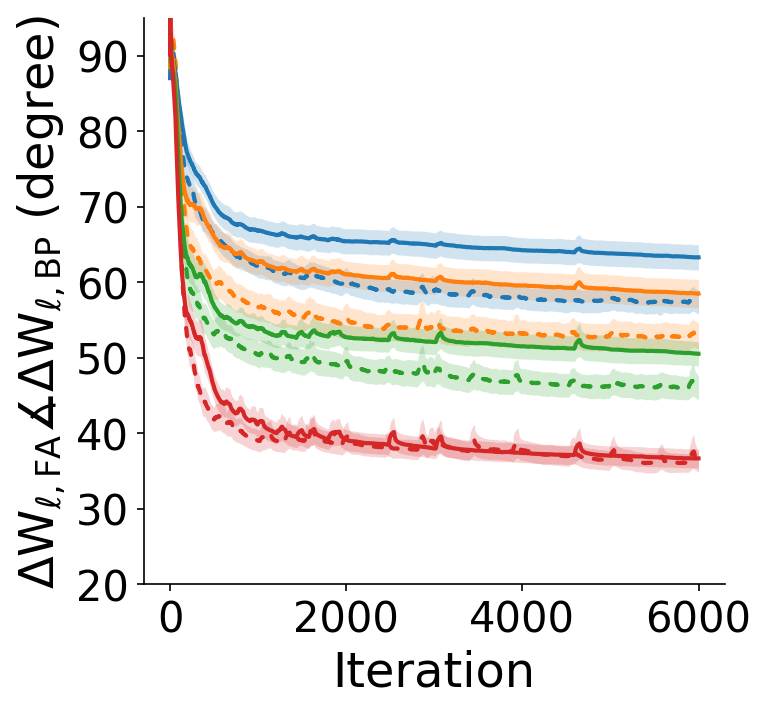

In [ ]:
y_axis_lim_W_B_angle = [65 , 95 , 5]



linestyle_1 =  (0, (2, 3))
linestyle_2 =  '-'



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(IBN)(DBNM)(Bias)/" 



str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_1 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_1= pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_1 = pickle.load(fp) 

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(IBN)(NoBNM)(Bias)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_2 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_2 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_2 = pickle.load(fp) 

figsize_ = (5,5)

################################################################

N_layers = angle_W_B_1.shape[0]

N_repetition = angle_W_B_1.shape[1]

length = angle_W_B_1.shape[-1]

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]


plt.figure(num = None, figsize=figsize_, dpi=150, facecolor='w', edgecolor='k')


for i in range(1,N_layers):
  x = angle_W_B_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  plt.plot( x_mean  , linestyle = linestyle_1 , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  



for i in range(1,N_layers):
  x = angle_W_B_2[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  plt.plot( x_mean  ,  linestyle = linestyle_2  , dash_capstyle='round' ,label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  


plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$W_{\ell } \measuredangle B_{\ell }^T \ (degree)$", fontsize= plt_fontsize_label_)




plt.title("Width: 50"    , fontsize= plt_fontsize_label_   )




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.ylim(y_axis_lim_W_B_angle[0],y_axis_lim_W_B_angle[1])
plt.yticks(list(range(y_axis_lim_W_B_angle[0] , y_axis_lim_W_B_angle[1] , y_axis_lim_W_B_angle [2])))

plt.savefig( base_directory_figure_str  +  'W_B_50_no_norm_B_norm_match.jpg' , dpi=300 , bbox_inches='tight') 


plt.show()





####################################################################################################################################################################################################
##################################################################################################





plt.figure(num = None, figsize=figsize_, dpi=150, facecolor='w', edgecolor='k')



for i in range(0,N_layers-1):
  x = angle_dW_BP_FA_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean  ,  linestyle = linestyle_1  , dash_capstyle='round' , label = r'$\Delta W_{' + str(i) +  ',FA} \measuredangle \Delta W_{'+ str(i) + ',BP}$'  , color = my_cycle[i] , linewidth=2  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(length)   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  




for i in range(0,N_layers-1):
  x = angle_dW_BP_FA_2[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean   ,  linestyle = linestyle_2  , dash_capstyle='round' , label = r'$\Delta W_{' + str(i) +  ',FA} \measuredangle \Delta W_{'+ str(i) + ',BP}$'  , color = my_cycle[i] , linewidth=2  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(length)   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  





plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$\Delta W_{\ell ,FA} \measuredangle \Delta W_{\ell ,BP} \ (degree)$", fontsize= plt_fontsize_label_)


ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(20,95)
plt.yticks(list(range(20,95,10)))
plt.savefig( base_directory_figure_str +  'dW_FA_BP_50_no_norm_B_norm_match.jpg' , dpi=300 , bbox_inches='tight') 

plt.show()


####################################################################################################################################################################################################
##################################################################################################




# Plot figure6 E,F

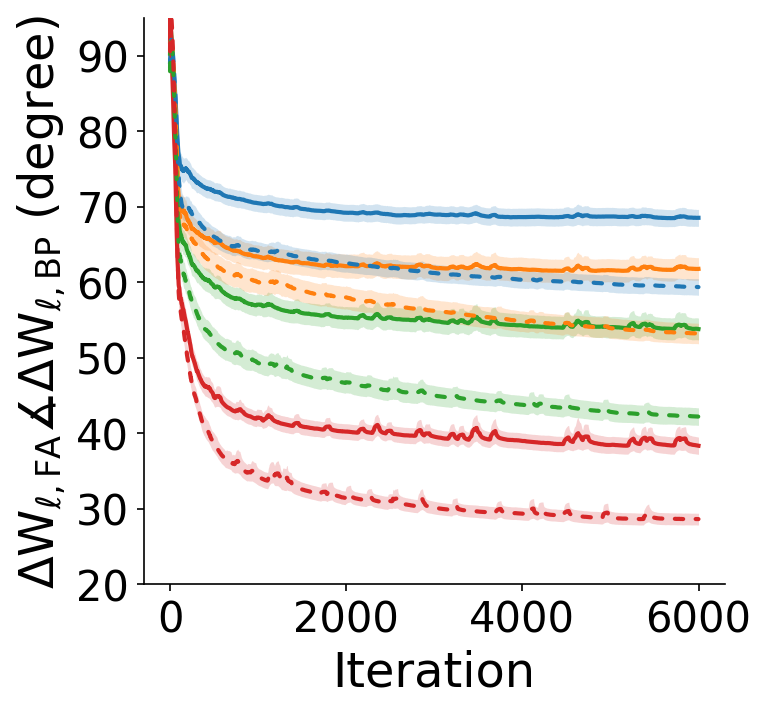

In [ ]:
y_axis_lim_W_B_angle = [65 , 95 , 5]

linestyle_1 =  '-'
linestyle_2 =  (0, (2, 3))




str_dir_data_BASE = base_directory_data_str + "FA(W_100_lr_0d0003)(NoWN)(IBN)(NoBNM)(Bias)/" 


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_1 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_1= pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_1 = pickle.load(fp) 





str_dir_data_BASE = base_directory_data_str + "FA(W_100_lr_0d0003)(CWN_1_1)(IBN)(NoBNM)(Bias)/"


str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B_2 = pickle.load(fp)


str_direction = str_dir_data_BASE + "angle_dW_BP_FA" + ".txt"
with open( str_direction  , "rb") as fp:   #Pickling
  angle_dW_BP_FA_2 = pickle.load(fp) 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_2 = pickle.load(fp) 

figsize_ = (5,5)

################################################################

N_layers = angle_W_B_1.shape[0]

N_repetition = angle_W_B_1.shape[1]

length = angle_W_B_1.shape[-1]

my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]


plt.figure(num = None, figsize=figsize_, dpi=150, facecolor='w', edgecolor='k')


for i in range(1,N_layers):
  x = angle_W_B_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  plt.plot( x_mean  , linestyle = linestyle_1 , dash_capstyle='round' , label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  


for i in range(1,N_layers):
  x = angle_W_B_2[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]


  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  plt.plot( x_mean  ,  linestyle = linestyle_2  , dash_capstyle='round' ,label = r'$W_' + str(i) +  ' \measuredangle B_'+ str(i) + '^T$'  , color = my_cycle[i] , linewidth=2 ) 
  plt.fill_between( range(length)  , x_mean-x_std , x_mean+x_std  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  


plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$W_{\ell } \measuredangle B_{\ell }^T \ (degree)$", fontsize= plt_fontsize_label_)




plt.title("Width: 100"    , fontsize= plt_fontsize_label_   )



ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.ylim(y_axis_lim_W_B_angle[0],y_axis_lim_W_B_angle[1])
plt.yticks(list(range(y_axis_lim_W_B_angle[0] , y_axis_lim_W_B_angle[1] , y_axis_lim_W_B_angle [2])))



plt.savefig( base_directory_figure_str +  'W_B_100_with_norm.jpg' , dpi=300 , bbox_inches='tight') 


plt.show()





####################################################################################################################################################################################################
##################################################################################################





plt.figure(num = None, figsize=figsize_, dpi=150, facecolor='w', edgecolor='k')




for i in range(0,N_layers-1):
  x = angle_dW_BP_FA_1[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean  ,  linestyle = linestyle_1  , dash_capstyle='round' , label = r'$\Delta W_{' + str(i) +  ',FA} \measuredangle \Delta W_{'+ str(i) + ',BP}$'  , color = my_cycle[i] , linewidth=2  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(length)   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  





for i in range(0,N_layers-1):
  x = angle_dW_BP_FA_2[i,:,:]

  x=x[((1*torch.isnan(x)).sum(dim=1) == 0)  , :]

  x_mean  = x.mean(dim=0).squeeze()
  x_std  = x.std(dim=0).squeeze()/np.sqrt(N_repetition)

  filtered_mean , filtered_std =  my_signal_processing.sliding_window(x_mean , 60)
  plt.plot( filtered_mean   ,  linestyle = linestyle_2  , dash_capstyle='round' , label = r'$\Delta W_{' + str(i) +  ',FA} \measuredangle \Delta W_{'+ str(i) + ',BP}$'  , color = my_cycle[i] , linewidth=2  ) 
  filtered_mean_1 , filtered_std_1 =  my_signal_processing.sliding_window(x_std , 60)
  plt.fill_between(  range(length)   , filtered_mean-filtered_mean_1 , filtered_mean+filtered_mean_1  , color = my_cycle2[i] , alpha=0.2 , linewidth=0    )  





plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$\Delta W_{\ell ,FA} \measuredangle \Delta W_{\ell ,BP} \ (degree)$", fontsize= plt_fontsize_label_)




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylim(20,95)
plt.yticks(list(range(20,95,10)))
plt.savefig( base_directory_figure_str +  'dW_FA_BP_100_with_norm.jpg' , dpi=300 , bbox_inches='tight') 

plt.show()


####################################################################################################################################################################################################
##################################################################################################

# Plot figure6 G

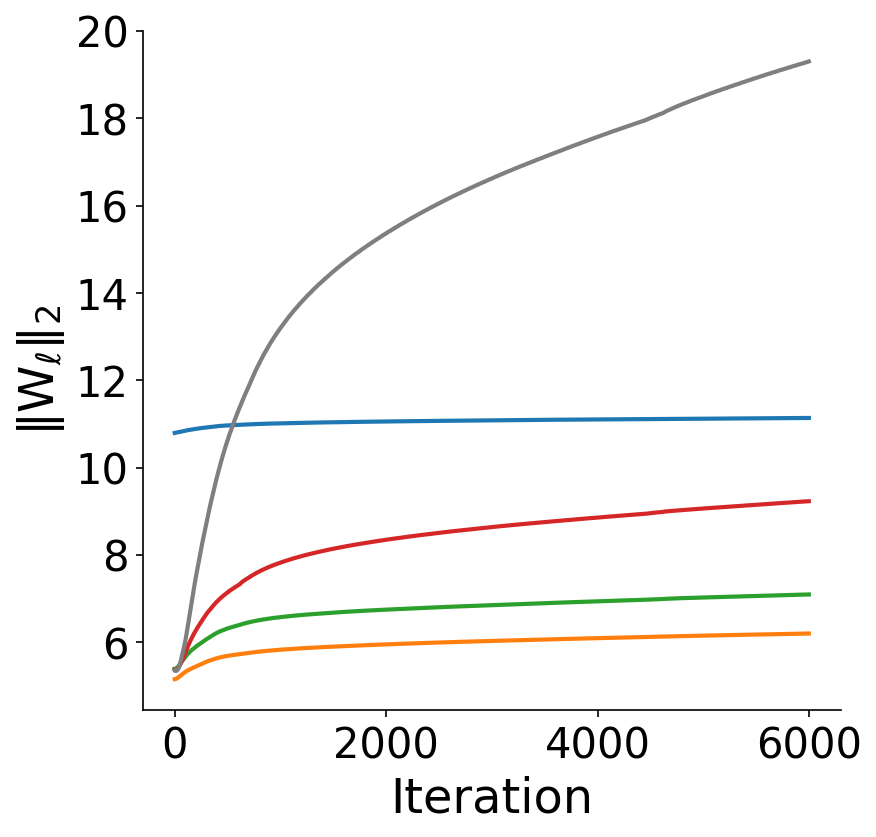

In [ ]:

linestyle_1 =  (0, (2, 3))



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(IBN)(NoBNM)(Bias)(Detailed)/" 


str_direction = str_dir_data_BASE + "dW_norms_BP" +  ".txt"

with open( str_direction , "rb") as fp:   #Pickling
  dW_norms_BP = pickle.load(fp)





str_direction = str_dir_data_BASE + "dW_norms" +  ".txt"

with open( str_direction , "rb") as fp:   #Pickling
  dW_norms_FA = pickle.load(fp)





str_direction = str_dir_data_BASE + "weight_norms" +  ".txt"




with open( str_direction , "rb") as fp:   #Pickling
  W_norms = pickle.load(fp)




figsize__ = (6,6)

plt.figure(num = None, figsize=figsize__, dpi=150, facecolor='w', edgecolor='k')


for l in range(W_norms.shape[0]):

  plt.plot( W_norms[l,:,:].mean(dim=0)  , '-' , label = r"$\ell\ " + str(l) + "$"  , linewidth = 2  , color= my_cycle[l] ) 



plt.xlabel("Iteration", fontsize= plt_fontsize_label_)
plt.ylabel(r"$\Vert  W_\ell \Vert_2$", fontsize= plt_fontsize_label_)




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)




plt.savefig( base_directory_figure_str +  'W_norm_no_norm.jpg' , dpi=300 , bbox_inches='tight') 

plt.show()



# Plot figure 6 H

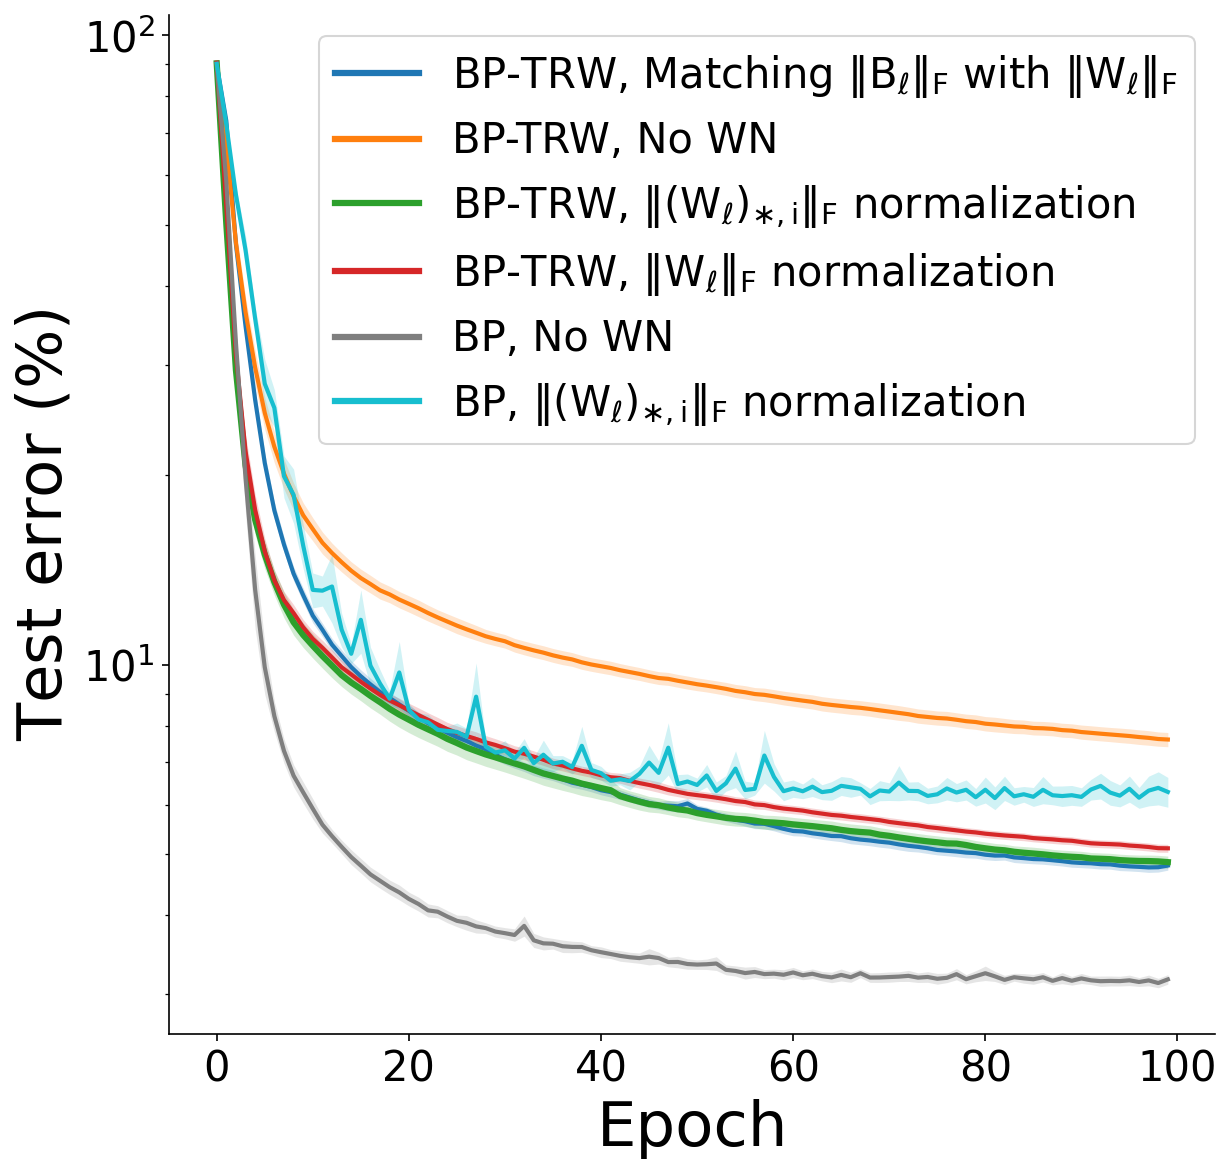

In [ ]:



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(IBN)(DBNM)(Bias)/" 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_1 = pickle.load(fp) 


str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(IBN)(NoBNM)(Bias)/" 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_2 = pickle.load(fp) 


str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(WWN_7d07)(IBN)(NoBNM)(Bias)/" 


str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_3 = pickle.load(fp) 


str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1_1)(IBN)(NoBNM)(Bias)/" 

str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  test_accuracy_list_repeat_4 = pickle.load(fp) 




str_dir_data_BASE = base_directory_data_str + "BP(W_50_lr_0d0003)(NoWN)(IBN)(NoBNM)(Bias)/" 
str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  testaccurac_1_bp = pickle.load(fp)
  
  

str_dir_data_BASE = base_directory_data_str + "BP(W_50_lr_0d0003)(CWN_0d6_0d6)(IBN)(NoBNM)(Bias)/" 
str_direction = str_dir_data_BASE + "test_accuracy_list_repeat" + ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  testaccurac_2_bp = pickle.load(fp)




test_accuracy_list_repeat_1 = 100-test_accuracy_list_repeat_1
test_accuracy_list_repeat_2 =100-test_accuracy_list_repeat_2
test_accuracy_list_repeat_3 =100-test_accuracy_list_repeat_3
test_accuracy_list_repeat_4 =100-test_accuracy_list_repeat_4

testaccurac_1_bp = 100-testaccurac_1_bp
testaccurac_2_bp = 100-testaccurac_2_bp


N_epoch = test_accuracy_list_repeat_1.shape[1]

plt.figure(num = None, figsize=(9,9) , dpi=150, facecolor='w', edgecolor='k')

i = 0
x = test_accuracy_list_repeat_1
SEM = test_accuracy_list_repeat_1.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[i] , linewidth=2  , label = r"BP-TRW, Matching $\Vert B_{\ell} \Vert _ F$ with $\Vert W_{\ell} \Vert _ F$"   )   
x_sem = x.std(dim=0)/SEM 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[i] , alpha=0.2 , linewidth=0)
i = i +1


x = test_accuracy_list_repeat_2
SEM = test_accuracy_list_repeat_2.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[i] , linewidth=2  , label = r"BP-TRW, No WN"   )   
x_sem = x.std(dim=0)/SEM 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[i] , alpha=0.2 , linewidth=0)
i = i +1



x = test_accuracy_list_repeat_4
SEM = test_accuracy_list_repeat_4.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[i] , linewidth=3  , label = r"BP-TRW, $\Vert (W_{\ell})_{\ast,i} \Vert _ F$ normalization" )   
x_sem = x.std(dim=0)/SEM 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[i] , alpha=0.2 , linewidth=0)
i = i +1



x = test_accuracy_list_repeat_3
SEM = test_accuracy_list_repeat_3.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[i] , linewidth=2  , label = r"BP-TRW, $\Vert W_{\ell} \Vert _ F$ normalization"   )   
x_sem = x.std(dim=0)/SEM 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[i] , alpha=0.2 , linewidth=0)
i = i +1




x = testaccurac_1_bp[:,0:100]
SEM = testaccurac_1_bp.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[i] , linewidth=2  , label = r"BP, No WN"   )   
x_sem = x.std(dim=0)/SEM 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[i] , alpha=0.2 , linewidth=0)
i = i +1

x = testaccurac_2_bp[:,0:100]
SEM = testaccurac_2_bp.shape[0]
SEM = np.sqrt(SEM)
x_mean = x.mean(dim=0) 
plt.plot( x_mean  , '-'  , color = my_cycle[i] , linewidth=2  , label = r"BP, $\Vert (W_{\ell})_{\ast,i} \Vert _ F$ normalization" )   
x_sem = x.std(dim=0)/SEM 
plt.fill_between( range(N_epoch)  , x_mean-x_sem , x_mean+x_sem  , color = my_cycle2[i] , alpha=0.2 , linewidth=0)
i = i +1



# plt.plot( angle_dW1_B_list  , '-' , label = "angle_dW1_B_list"  ) 
plt.xlabel("Epoch", fontsize= plt_fontsize_label_)
plt.ylabel(r"$Test\ error\ (\%)$", fontsize= plt_fontsize_label_)


leg = plt.legend( loc= 'upper right'  , fontsize = plt_fontsize_legend_ -7  )

for line in leg.get_lines():
    line.set_linewidth(3.0)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
# plt.ylim(0,100)
plt.yscale('log')
dir_str = base_directory_figure_str + "combined_test_errors2.jpg"
plt.savefig( dir_str , dpi=300 , bbox_inches='tight') 
plt.show( )


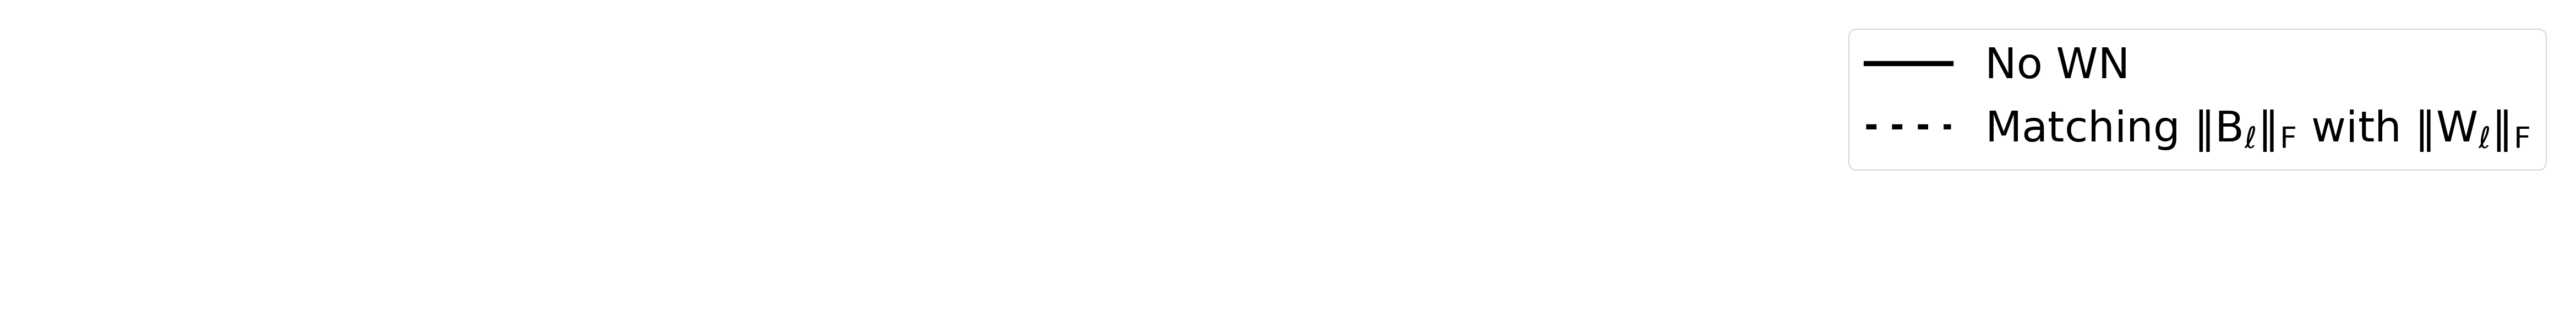

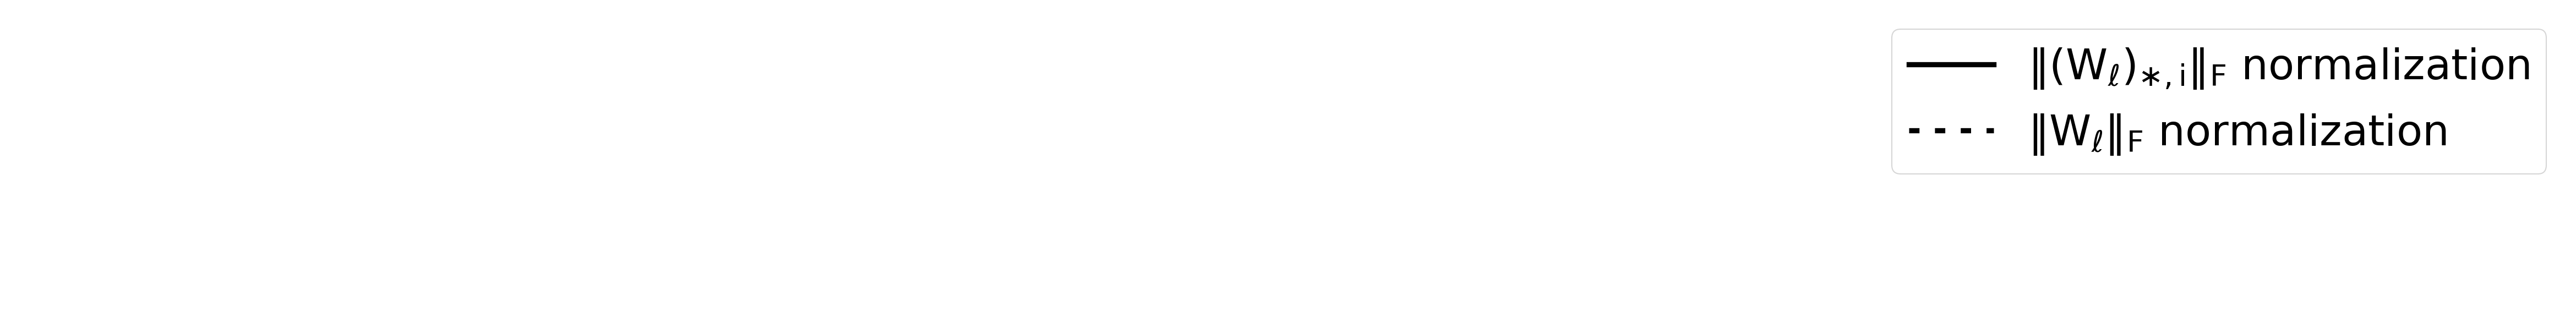

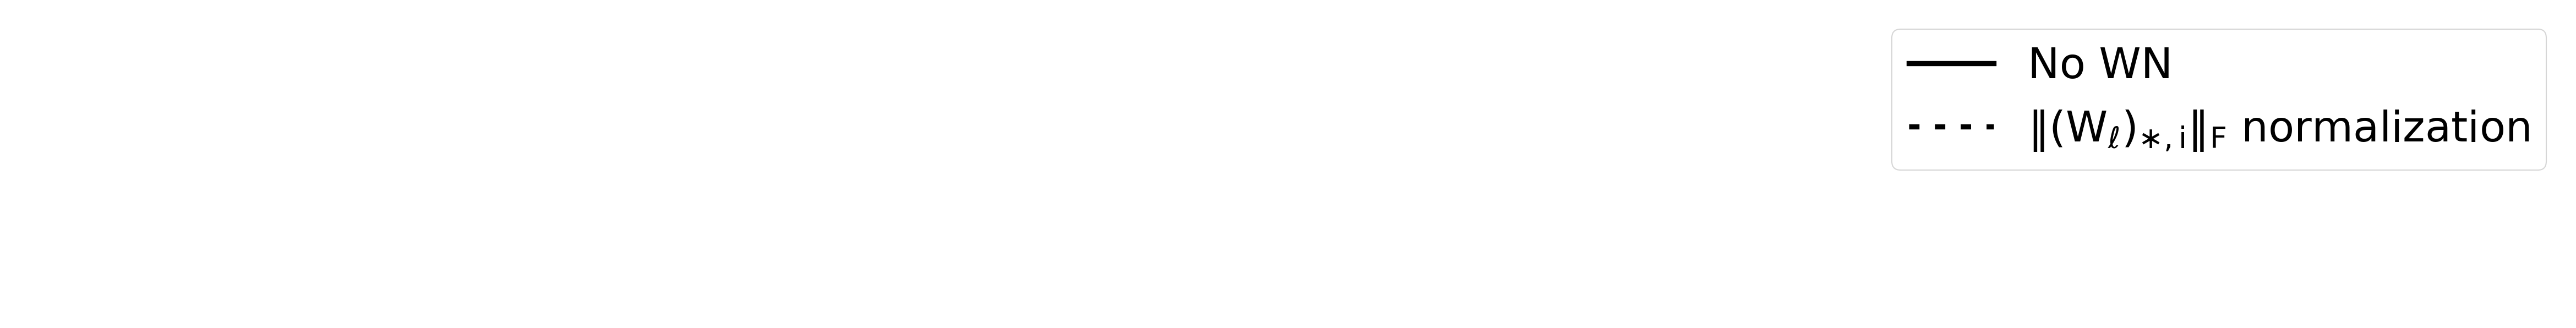

In [ ]:


def export_legend(legend, filename  , expand=[-40,-40,40,40]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)


fig = plt.figure(num = None, figsize=(40,5) , dpi=150, facecolor='w', edgecolor='k')

linestyle_1 =  (0, (2, 3))

plt.plot( [0]    , label =  r"No WN" , alpha = 1 , color = 'k'  ) 
plt.plot( [0]    , label =  r"Matching $\Vert B_{\ell} \Vert _ F$ with $\Vert W_{\ell} \Vert _ F$"  , linestyle = linestyle_1 , alpha = 1 , color = 'k'  ) 



leg =  plt.legend(  fontsize = plt_fontsize_legend_ +10 , markerscale=6 ,ncol=1 )

for line in leg.get_lines():
    line.set_linewidth(4.5)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


plt.axis('off')
dir_str = base_directory_figure_str + "legends_1.jpg"
export_legend(leg  , filename= dir_str  )


plt.show()




plt.figure(num = None, figsize=(40,5) , dpi=150, facecolor='w', edgecolor='k')

linestyle_1 =  (0, (2, 3))

plt.plot( [0]    , label =  r"$\Vert (W_{\ell})_{\ast,i} \Vert _ F$ normalization", alpha = 1 , color = 'k'  ) 
plt.plot( [0]    , label =  r"$\Vert W_{\ell} \Vert _ F$ normalization"  , linestyle = linestyle_1 , alpha = 1 , color = 'k'  ) 



leg =  plt.legend(  fontsize = plt_fontsize_legend_ +10 , markerscale=6 ,ncol=1 )

for line in leg.get_lines():
    line.set_linewidth(4.5)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)



ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


plt.axis('off')
dir_str = base_directory_figure_str + "legends_2.jpg"
export_legend(leg  , filename= dir_str  )



plt.show()




plt.figure(num = None, figsize=(40,5) , dpi=150, facecolor='w', edgecolor='k')

linestyle_1 =  (0, (2, 3))



plt.plot( [0]    , label =  r"No WN"  , alpha = 1 , color = 'k'  ) 
plt.plot( [0]    , label =  r"$\Vert (W_{\ell})_{\ast,i} \Vert _ F$ normalization" , linestyle = linestyle_1  , alpha = 1 , color = 'k'  ) 




leg =  plt.legend(  fontsize = plt_fontsize_legend_ +10 , markerscale=6 ,ncol=1 )

for line in leg.get_lines():
    line.set_linewidth(4.5)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)



ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


plt.axis('off')
dir_str = base_directory_figure_str + "legends_3.jpg"
export_legend(leg  , filename= dir_str  )


plt.show()

# Plot figure 7 A

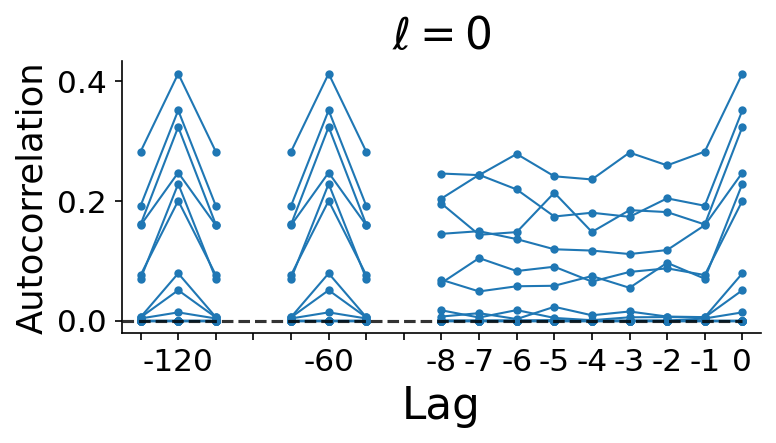

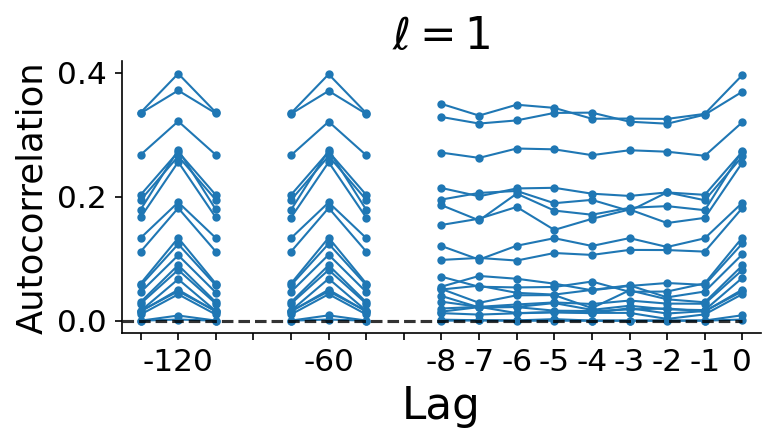

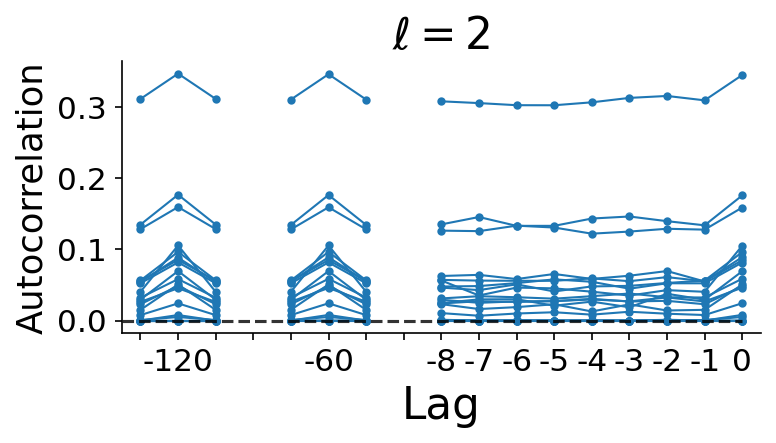

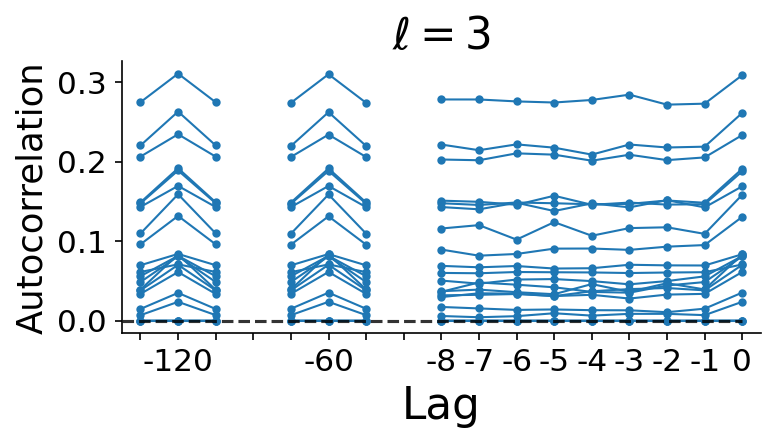

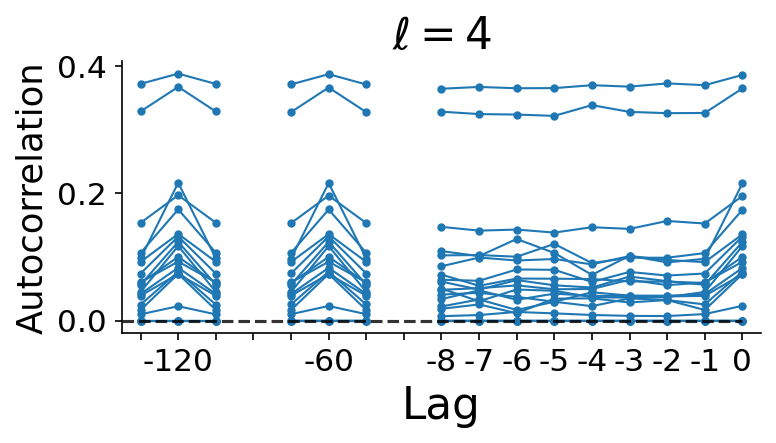

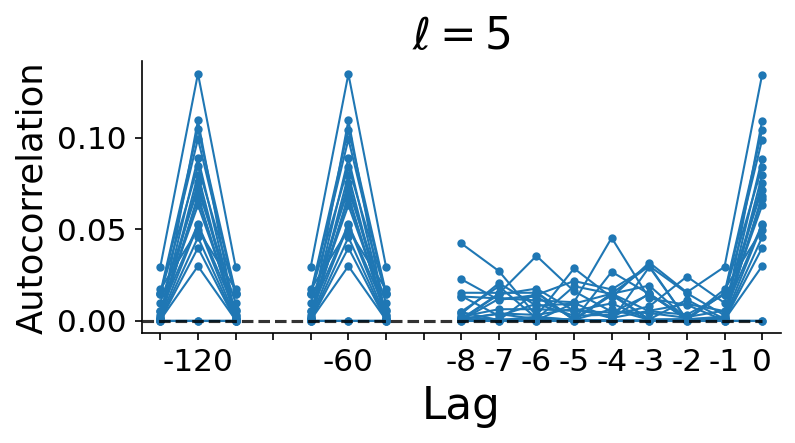

In [ ]:
plt_fontsize_label__2 = plt_fontsize_label_ - 9


str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(IBN)(NoBNM)(Bias)(Detailed)/" 




str_direction = str_dir_data_BASE + "L_signals" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  delta_signals = pickle.load(fp)



n_layers = delta_signals.shape[0]

N_signals = delta_signals.shape[1]
from_lagn = -8
to_lagp = 0

for l in range(n_layers):


  corre_list = []
  corre_list2 = []
  corre_list3 = []
  for k in range(N_signals):
    lags , corre = my_signal_processing.correlogram(   delta_signals[ l , k , 0 , : ].flatten().cpu() 
    , delta_signals[ l ,  k , 0 , : ].flatten().cpu() , from_lagn , to_lagp   )
    corre_list.append(corre)

    lags2 , corre = my_signal_processing.correlogram(   delta_signals[ l , k , 0 , : ].flatten().cpu() 
    , delta_signals[ l ,  k , 0 , : ].flatten().cpu() , -61 , -59   )
    corre_list2.append(corre)

    lags3 , corre = my_signal_processing.correlogram(   delta_signals[ l , k , 0 , : ].flatten().cpu() 
    , delta_signals[ l ,  k , 0 , : ].flatten().cpu() , -121 , -119   )
    corre_list3.append(corre)


  plt.figure(num = None, figsize=(5.5,2.4), dpi=150, facecolor='w', edgecolor='k')

  j = 0
  for i in range(len(corre_list)):

      plt.plot(lags,  corre_list[i]  , '-'  , color = my_cycle[0] , linewidth=1 , marker = 'o' , markersize=3 )   
      plt.plot(lags2 + 49,  corre_list2[i]  , '-'  , color = my_cycle[0] , linewidth=1 , marker = 'o' , markersize=3 )   
      plt.plot(lags3 + 105,  corre_list3[i]  , '-'  , color = my_cycle[0] , linewidth=1 , marker = 'o' , markersize=3 )   

  plt.hlines(y=0 , xmin=-16.5 , xmax=0 , linestyles='--'  , alpha = 0.8 , color='k' ,zorder=100 )

  plt.xlabel("Lag", fontsize= plt_fontsize_label__2)
  plt.ylabel(r"Autocorrelation", fontsize= plt_fontsize_label__2-4)





  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=15)
  ax.tick_params(axis='y', labelsize=15)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_label__2)
  plt.xlim(-16.5,0.5)


  plt.xticks( range(-16 , 1 , 1) , ['' , '-120' , '' , '' , '' , '-60', '' , '' , '-8' , '-7' ,'-6'
          ,'-5' ,'-4' ,'-3' ,'-2','-1','0' ] )
  plt.savefig( base_directory_figure_str +  "L_signals_autocorre l_"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight') 

  plt.show( )




# Plot figure 7 B

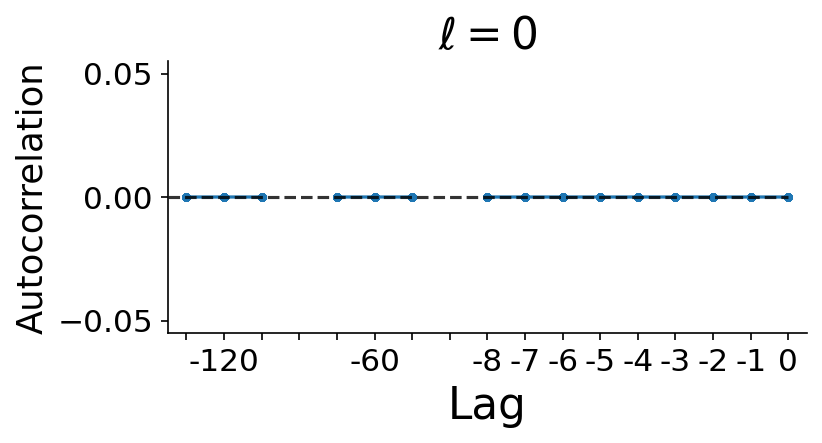

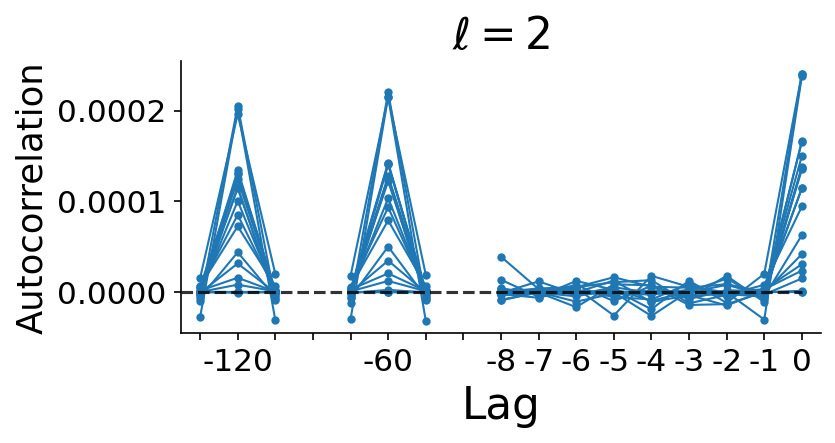

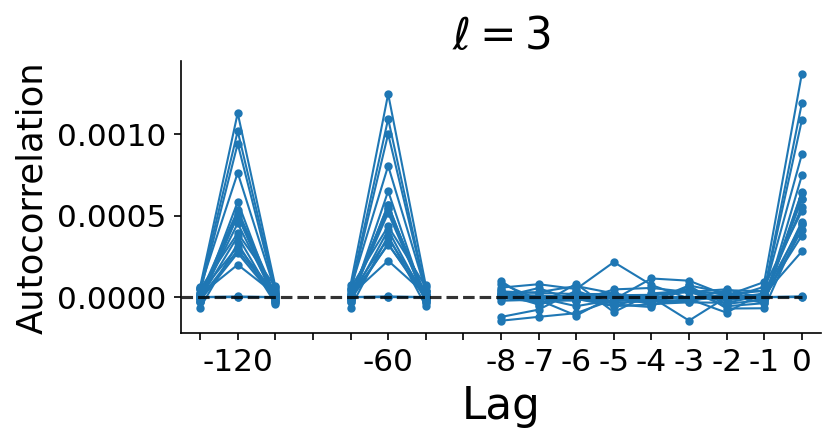

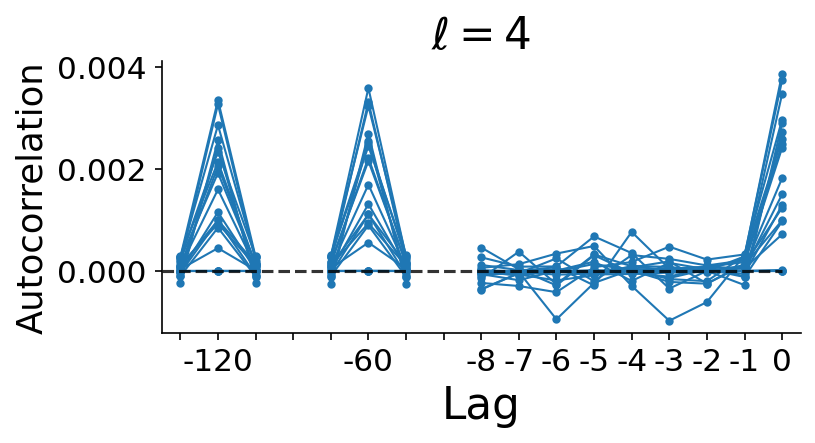

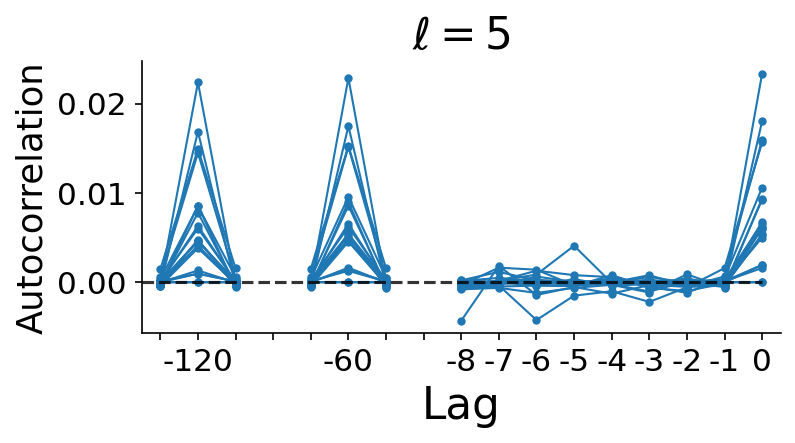

In [ ]:
plt_fontsize_label__2 = plt_fontsize_label_ - 9

str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(IBN)(NoBNM)(Bias)(Detailed)/" 



str_direction = str_dir_data_BASE + "delta_signals" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  delta_signals = pickle.load(fp)


n_layers = delta_signals.shape[0]

N_signals = delta_signals.shape[1]
from_lagn = -8
to_lagp = 0

for l in range(n_layers):


  corre_list = []
  corre_list2 = []
  corre_list3 = []
  for k in range(N_signals):
    lags , corre = my_signal_processing.correlogram(   delta_signals[ l , k , 0 , : ].flatten().cpu() 
    , delta_signals[ l ,  k , 0 , : ].flatten().cpu() , from_lagn , to_lagp   )
    corre_list.append(corre)

    lags2 , corre = my_signal_processing.correlogram(   delta_signals[ l , k , 0 , : ].flatten().cpu() 
    , delta_signals[ l ,  k , 0 , : ].flatten().cpu() , -61 , -59   )
    corre_list2.append(corre)

    lags3 , corre = my_signal_processing.correlogram(   delta_signals[ l , k , 0 , : ].flatten().cpu() 
    , delta_signals[ l ,  k , 0 , : ].flatten().cpu() , -121 , -119   )
    corre_list3.append(corre)


  plt.figure(num = None, figsize=(5.5,2.4), dpi=150, facecolor='w', edgecolor='k')

  j = 0
  for i in range(len(corre_list)):

      plt.plot(lags,  corre_list[i]  , '-'  , color = my_cycle[0] , linewidth=1 , marker = 'o' , markersize=3 )   
      plt.plot(lags2 + 49,  corre_list2[i]  , '-'  , color = my_cycle[0] , linewidth=1 , marker = 'o' , markersize=3 )   
      plt.plot(lags3 + 105,  corre_list3[i]  , '-'  , color = my_cycle[0] , linewidth=1 , marker = 'o' , markersize=3 )   

  plt.hlines(y=0 , xmin=-16.5 , xmax=0 , linestyles='--'  , alpha = 0.8 , color='k' ,zorder=100 )


  plt.xlabel("Lag", fontsize= plt_fontsize_label__2)
  plt.ylabel(r"Autocorrelation", fontsize= plt_fontsize_label__2-4 )


 

  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=15)
  ax.tick_params(axis='y', labelsize=15)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_label__2)
  plt.xlim(-16.5,0.5)


  plt.xticks( range(-16 , 1 , 1) , ['' , '-120' , '' , '' , '' , '-60', '' , '' , '-8' , '-7' ,'-6'
          ,'-5' ,'-4' ,'-3' ,'-2','-1','0' ] )
  plt.savefig( base_directory_figure_str +  "delta_signals_autocorre l_"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight') 

  plt.show( )




# Plot figure 7 C

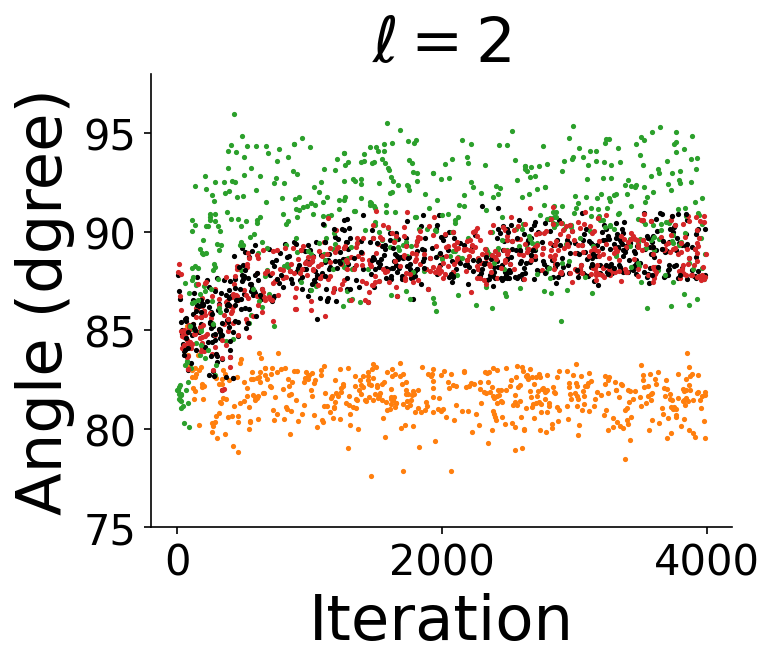

In [ ]:




str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(NoWN)(IBN)(NoBNM)(Bias)(Detailed)/" 


plt_fontsize_label__2 = 15
x=1



str_direction = str_dir_data_BASE + "angle_T_align_60_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_T_align_60_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_T_align_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_T_align_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_T_supalign_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_T_subalign_B = pickle.load(fp)



str_direction = str_dir_data_BASE + "angle_sum_T_align_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_sum_T_align_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_sum_T_align_60_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_sum_T_align_60_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_sum_T_supalign_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_sum_T_subalign_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)


n_layers = angle_sum_T_align_B.shape[0]
n_iter = angle_sum_T_align_B.shape[2]
n_iter = 4000
for l in range(1,n_layers):


  plt.figure(num = None, figsize=(5,4) , dpi=150, facecolor='w', edgecolor='k')



  angle_W_B_list_residue = list( range(0,n_iter)  )
  angle_W_B_list = random.sample( angle_W_B_list_residue , 500 )
  for elem in angle_W_B_list_residue:
    if elem in angle_W_B_list :
        angle_W_B_list_residue.remove(elem)

  plt.plot( angle_W_B_list , angle_dW_B[l,0, angle_W_B_list ] , '.'  , color = 'k', linewidth=2 , markersize = 3 )   



  angle_T_align_60_B_list_residue = list( range(65,n_iter) )
  angle_T_align_60_B_list = random.sample( angle_T_align_60_B_list_residue , 500 )
  for elem in angle_T_align_60_B_list_residue:
    if elem in angle_T_align_60_B_list :
        angle_T_align_60_B_list_residue.remove(elem)

  plt.plot( angle_T_align_60_B_list , angle_T_align_60_B[l,0, angle_T_align_60_B_list ] , '.' , color = my_cycle[1] , linewidth=2 
           , markersize = 3)   


  angle_T_align_B_list_residue = list( range(0,n_iter) )
  angle_T_align_B_list = random.sample( angle_T_align_B_list_residue , 500 )
  for elem in angle_T_align_B_list_residue:
    if elem in angle_T_align_B_list :
        angle_T_align_B_list_residue.remove(elem)

  plt.plot( angle_T_align_B_list ,  angle_T_align_B[l,0, angle_T_align_B_list ] , '.' , color = my_cycle[2] , linewidth=2 
           , markersize = 3 )   



  angle_T_subalign_B_list_residue = list( range(0,n_iter) )
  angle_T_subalign_B_list = random.sample( angle_T_subalign_B_list_residue , 500 )
  for elem in angle_T_subalign_B_list_residue:
    if elem in angle_T_subalign_B_list :
        angle_T_subalign_B_list_residue.remove(elem)


  plt.plot( angle_T_subalign_B_list , angle_T_subalign_B[l,0, angle_T_subalign_B_list ] , '.'  , color = my_cycle[3]  , linewidth=2
           , markersize = 3)   


  angle_T_subalign_B_list = random.sample( angle_T_subalign_B_list_residue[0:500] , 50 )
  for elem in angle_T_subalign_B_list_residue:
    if elem in angle_T_subalign_B_list :
        angle_T_subalign_B_list_residue.remove(elem)


  plt.plot( angle_T_subalign_B_list , angle_T_subalign_B[l,0, angle_T_subalign_B_list ] , '.'  , color = my_cycle[3]  , linewidth=2
           , markersize = 3)   
  

  angle_W_B_list = random.sample( angle_W_B_list_residue[0:500] , 50 )
  for elem in angle_W_B_list_residue:
    if elem in angle_W_B_list :
        angle_W_B_list_residue.remove(elem)

  plt.plot( angle_W_B_list , angle_dW_B[l,0, angle_W_B_list ] , '.'  , color = 'k', linewidth=2 , markersize = 3 )   



  angle_T_align_B_list = random.sample( angle_T_align_B_list_residue[0:300] , 50 )
  for elem in angle_T_align_B_list_residue:
    if elem in angle_T_align_B_list :
        angle_T_align_B_list_residue.remove(elem)

  plt.plot( angle_T_align_B_list ,  angle_T_align_B[l,0, angle_T_align_B_list ] , '.' , color = my_cycle[2] , linewidth=2 
           , markersize = 3 )   


  angle_W_B_list = random.sample( angle_W_B_list_residue , 100 )
  for elem in angle_W_B_list_residue:
    if elem in angle_W_B_list :
        angle_W_B_list_residue.remove(elem)

  plt.plot( angle_W_B_list , angle_dW_B[l,0, angle_W_B_list ] , '.'  , color = 'k', linewidth=2 , markersize = 3 )   


  plt.ylabel("Angle (dgree)", fontsize= plt_fontsize_label_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_label_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=20)
  ax.tick_params(axis='y', labelsize=20)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_label_)
  plt.ylim(75,98)

  plt.savefig( base_directory_figure_str +  "detail_NoWN l_"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight') 

  plt.show( )


# Plot figure 7 D

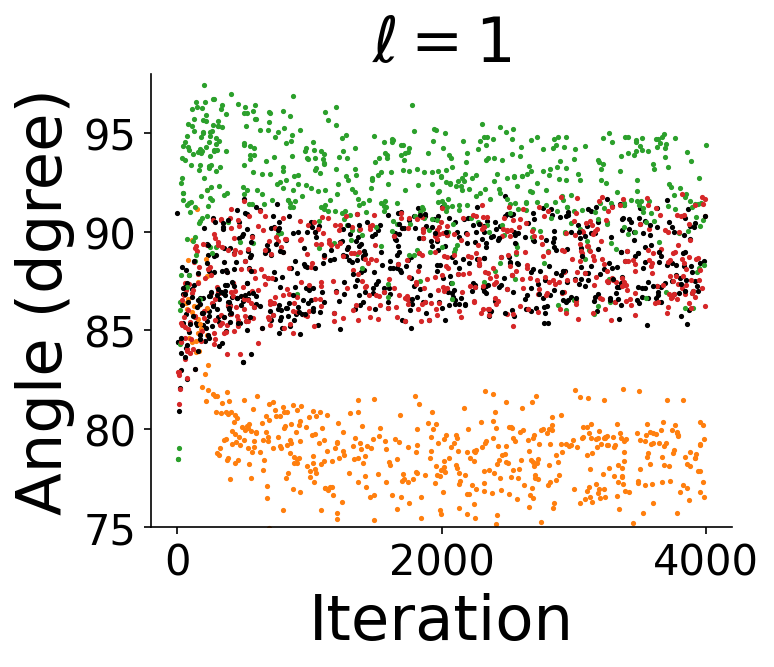

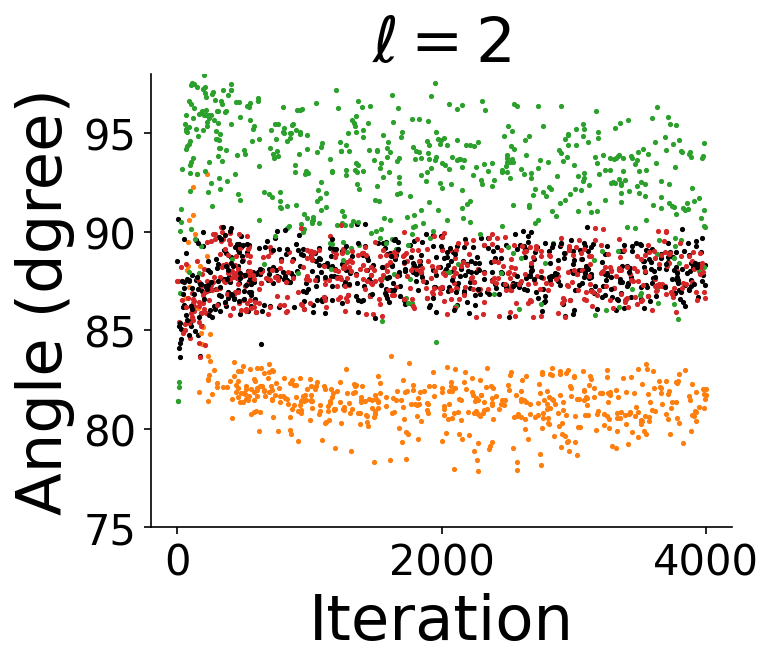

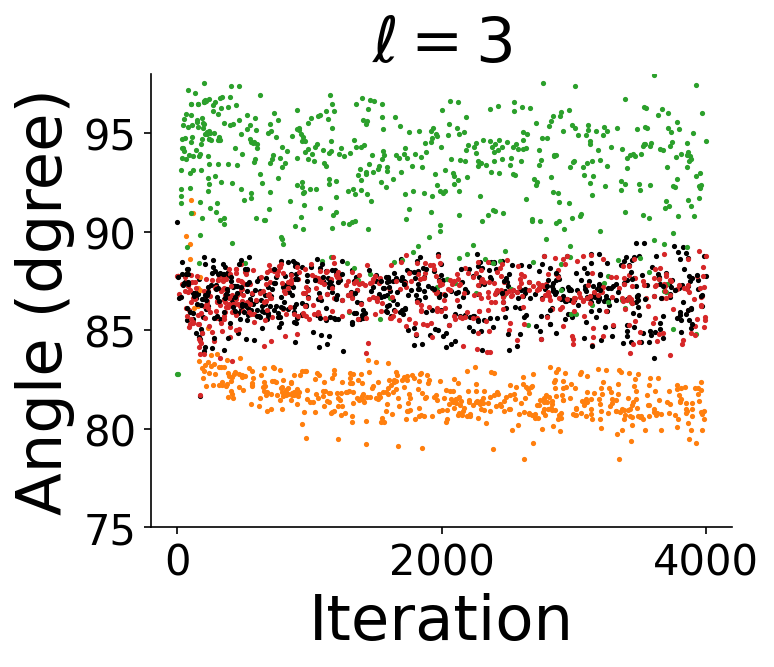

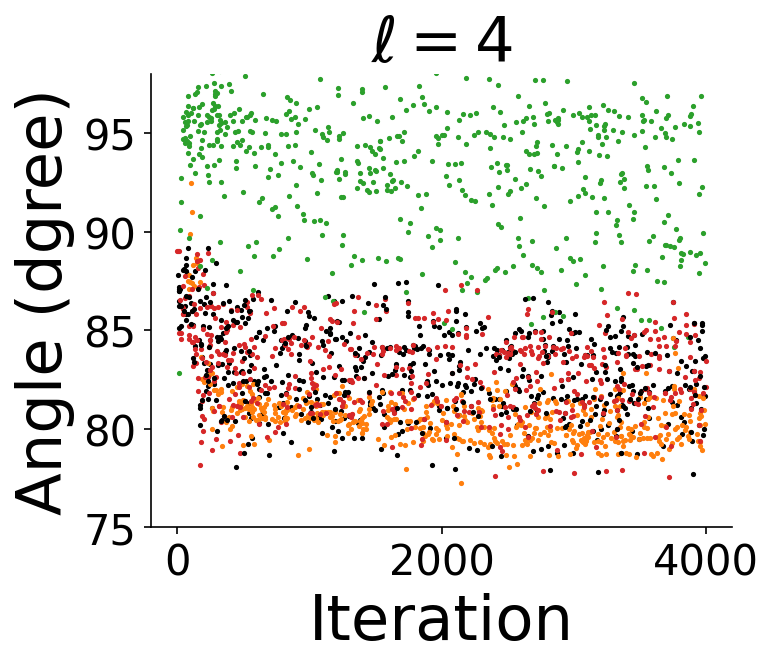

In [ ]:



str_dir_data_BASE = base_directory_data_str + "FA(W_50_lr_0d0005)(CWN_1_1)(IBN)(NoBNM)(Bias)(Detailed)/" 

plt_fontsize_label__2 = 15




str_direction = str_dir_data_BASE + "angle_T_align_60_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_T_align_60_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_T_align_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_T_align_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_T_supalign_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_T_subalign_B = pickle.load(fp)



str_direction = str_dir_data_BASE + "angle_sum_T_align_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_sum_T_align_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_sum_T_align_60_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_sum_T_align_60_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_sum_T_supalign_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_sum_T_subalign_B = pickle.load(fp)




str_direction = str_dir_data_BASE + "angle_W_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_W_B = pickle.load(fp)

str_direction = str_dir_data_BASE + "angle_dW_B" +  ".txt"
with open( str_direction , "rb") as fp:   #Pickling
  angle_dW_B = pickle.load(fp)


n_layers = angle_sum_T_align_B.shape[0]
n_iter = angle_sum_T_align_B.shape[2]
n_iter = 4000
for l in range(1,n_layers):


  plt.figure(num = None, figsize=(5,4) , dpi=150, facecolor='w', edgecolor='k')





  angle_W_B_list_residue = list( range(0,n_iter)  )
  angle_W_B_list = random.sample( angle_W_B_list_residue , 500 )
  for elem in angle_W_B_list_residue:
    if elem in angle_W_B_list :
        angle_W_B_list_residue.remove(elem)

  plt.plot( angle_W_B_list , angle_dW_B[l,0, angle_W_B_list ] , '.'  , color = 'k', linewidth=2 , markersize = 3 )   



  angle_T_align_60_B_list_residue = list( range(65,n_iter) )
  angle_T_align_60_B_list = random.sample( angle_T_align_60_B_list_residue , 500 )
  for elem in angle_T_align_60_B_list_residue:
    if elem in angle_T_align_60_B_list :
        angle_T_align_60_B_list_residue.remove(elem)

  plt.plot( angle_T_align_60_B_list , angle_T_align_60_B[l,0, angle_T_align_60_B_list ] , '.' , color = my_cycle[1] , linewidth=2 
           , markersize = 3)   


  angle_T_align_B_list_residue = list( range(0,n_iter) )
  angle_T_align_B_list = random.sample( angle_T_align_B_list_residue , 500 )
  for elem in angle_T_align_B_list_residue:
    if elem in angle_T_align_B_list :
        angle_T_align_B_list_residue.remove(elem)

  plt.plot( angle_T_align_B_list ,  angle_T_align_B[l,0, angle_T_align_B_list ] , '.' , color = my_cycle[2] , linewidth=2 
           , markersize = 3 )   



  angle_T_subalign_B_list_residue = list( range(0,n_iter) )
  angle_T_subalign_B_list = random.sample( angle_T_subalign_B_list_residue , 500 )
  for elem in angle_T_subalign_B_list_residue:
    if elem in angle_T_subalign_B_list :
        angle_T_subalign_B_list_residue.remove(elem)


  plt.plot( angle_T_subalign_B_list , angle_T_subalign_B[l,0, angle_T_subalign_B_list ] , '.'  , color = my_cycle[3]  , linewidth=2
           , markersize = 3)   


  angle_T_subalign_B_list = random.sample( angle_T_subalign_B_list_residue[0:500] , 50 )
  for elem in angle_T_subalign_B_list_residue:
    if elem in angle_T_subalign_B_list :
        angle_T_subalign_B_list_residue.remove(elem)


  plt.plot( angle_T_subalign_B_list , angle_T_subalign_B[l,0, angle_T_subalign_B_list ] , '.'  , color = my_cycle[3]  , linewidth=2
           , markersize = 3)   
  

  angle_W_B_list = random.sample( angle_W_B_list_residue[0:500] , 50 )
  for elem in angle_W_B_list_residue:
    if elem in angle_W_B_list :
        angle_W_B_list_residue.remove(elem)

  plt.plot( angle_W_B_list , angle_dW_B[l,0, angle_W_B_list ] , '.'  , color = 'k', linewidth=2 , markersize = 3 )   



  angle_T_align_B_list = random.sample( angle_T_align_B_list_residue[0:300] , 50 )
  for elem in angle_T_align_B_list_residue:
    if elem in angle_T_align_B_list :
        angle_T_align_B_list_residue.remove(elem)

  plt.plot( angle_T_align_B_list ,  angle_T_align_B[l,0, angle_T_align_B_list ] , '.' , color = my_cycle[2] , linewidth=2 
           , markersize = 3 )   

  angle_W_B_list = random.sample( angle_W_B_list_residue , 100 )
  for elem in angle_W_B_list_residue:
    if elem in angle_W_B_list :
        angle_W_B_list_residue.remove(elem)

  plt.plot( angle_W_B_list , angle_dW_B[l,0, angle_W_B_list ] , '.'  , color = 'k', linewidth=2 , markersize = 3 )   



  plt.ylabel("Angle (dgree)", fontsize= plt_fontsize_label_)
  plt.xlabel(r"Iteration", fontsize= plt_fontsize_label_ )




  ax = plt.gca()
  ax.spines['right'].set_color('none')
  ax.spines['top'].set_color('none')
  ax.xaxis.set_ticks_position('bottom')
  ax.yaxis.set_ticks_position('left')

  ax.tick_params(axis='x', labelsize=20)
  ax.tick_params(axis='y', labelsize=20)
  plt.title(r"$\ell = " + str(l) + "$"  , fontsize= plt_fontsize_label_)
  plt.ylim(75,98)

  plt.savefig( base_directory_figure_str +  "detail_WN l_"+ str(l) +".jpg" , dpi=300 , bbox_inches='tight') 

  plt.show( )


#FA run for  sensitivity analysis

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [ 0.0005  ]:

        for LS in [ None   ]:

            one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50, code_map=code_map50
              , bias = True
              , B_Norm_Match_During = False 
              , initial_B_normalization = True
              , Normalize_whole_W_ = None
              , Normalize_Column_W_ = Column_Normalize_W
              , lr = lr
              , N_repeat = 10
              , save_details = False
              , label_smoothing = LS
              , FA_method=True
              , skip_existing = True
            )

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [  0.0003  ]:

        for LS in [ None   ]:

            one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50, code_map=code_map50
              , bias = True
              , B_Norm_Match_During = False 
              , initial_B_normalization = True
              , Normalize_whole_W_ = None
              , Normalize_Column_W_ = Column_Normalize_W
              , lr = lr
              , N_repeat = 10
              , save_details = False
              , label_smoothing = LS
              , FA_method=True
              , skip_existing = True
            )

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [ 0.0005  ]:

        for LS in [ [0.95 , 0.05]   ]:

            one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50, code_map=code_map50
              , bias = True
              , B_Norm_Match_During = False 
              , initial_B_normalization = True
              , Normalize_whole_W_ = None
              , Normalize_Column_W_ = Column_Normalize_W
              , lr = lr
              , N_repeat = 10
              , save_details = False
              , label_smoothing = LS
              , FA_method=True
              , skip_existing = True
            )

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [   0.0003  ]:

        for LS in [   [0.95 , 0.05]  ]:

            one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50, code_map=code_map50
              , bias = True
              , B_Norm_Match_During = False 
              , initial_B_normalization = True
              , Normalize_whole_W_ = None
              , Normalize_Column_W_ = Column_Normalize_W
              , lr = lr
              , N_repeat = 10
              , save_details = False
              , label_smoothing = LS
              , FA_method=True
              , skip_existing = True
            )

#BP run for  sensitivity analysis

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [ 0.0005  ]:

        for LS in [ None   ]:

            one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50, code_map=code_map50
              , bias = True
              , B_Norm_Match_During = False 
              , initial_B_normalization = True
              , Normalize_whole_W_ = None
              , Normalize_Column_W_ = Column_Normalize_W
              , lr = lr
              , N_repeat = 10
              , save_details = False
              , label_smoothing = LS
              , FA_method=False
              , skip_existing = True
            )

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [  0.0003  ]:

        for LS in [ None   ]:

            one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50, code_map=code_map50
              , bias = True
              , B_Norm_Match_During = False 
              , initial_B_normalization = True
              , Normalize_whole_W_ = None
              , Normalize_Column_W_ = Column_Normalize_W
              , lr = lr
              , N_repeat = 10
              , save_details = False
              , label_smoothing = LS
              , FA_method=False
              , skip_existing = True
            )

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [ 0.0005  ]:

        for LS in [ [0.95 , 0.05]   ]:

            one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50, code_map=code_map50
              , bias = True
              , B_Norm_Match_During = False 
              , initial_B_normalization = True
              , Normalize_whole_W_ = None
              , Normalize_Column_W_ = Column_Normalize_W
              , lr = lr
              , N_repeat = 10
              , save_details = False
              , label_smoothing = LS
              , FA_method=False
              , skip_existing = True
            )

In [ ]:
for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:

    for lr in [   0.0003  ]:

        for LS in [   [0.95 , 0.05]  ]:

            one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50, code_map=code_map50
              , bias = True
              , B_Norm_Match_During = False 
              , initial_B_normalization = True
              , Normalize_whole_W_ = None
              , Normalize_Column_W_ = Column_Normalize_W
              , lr = lr
              , N_repeat = 10
              , save_details = False
              , label_smoothing = LS
              , FA_method=False
              , skip_existing = True
            )

# Plot sensitivity angle

In [ ]:
experiment_list_BP = []


for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:
      for LS in [ [0.95 , 0.05] , None ]:

        temp_list = []
        for lr in [ 0.0005 ,  0.0003 ]:


            str_t  = one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50, code_map=code_map50
              , bias = True
              , B_Norm_Match_During = False 
              , initial_B_normalization = True
              , Normalize_whole_W_ = None
              , Normalize_Column_W_ = Column_Normalize_W
              , lr = lr
              , N_repeat = 10
              , save_details = False
              , label_smoothing = LS
              , FA_method=False
              , skip_existing = True
            )


            temp_list.append(str_t)

        experiment_list_BP.append(temp_list)

experiment_list_FA = []


for Column_Normalize_W in [ None , 0.25 , 0.5 , 0.75 , 1  , 1.5 , 2 , 2.5   ]:
      for LS in [ [0.95 , 0.05] , None ]:

        temp_list = []
        for lr in [ 0.0005 ,  0.0003 ]:


            str_t  = one_run_function2(base_directory_data_str ,  train_loader50  , test_loader50, code_map=code_map50
              , bias = True
              , B_Norm_Match_During = False 
              , initial_B_normalization = True
              , Normalize_whole_W_ = None
              , Normalize_Column_W_ = Column_Normalize_W
              , lr = lr
              , N_repeat = 10
              , save_details = False
              , label_smoothing = LS
              , FA_method=True
              , skip_existing = True
            )


            temp_list.append(str_t)

        experiment_list_FA.append(temp_list)

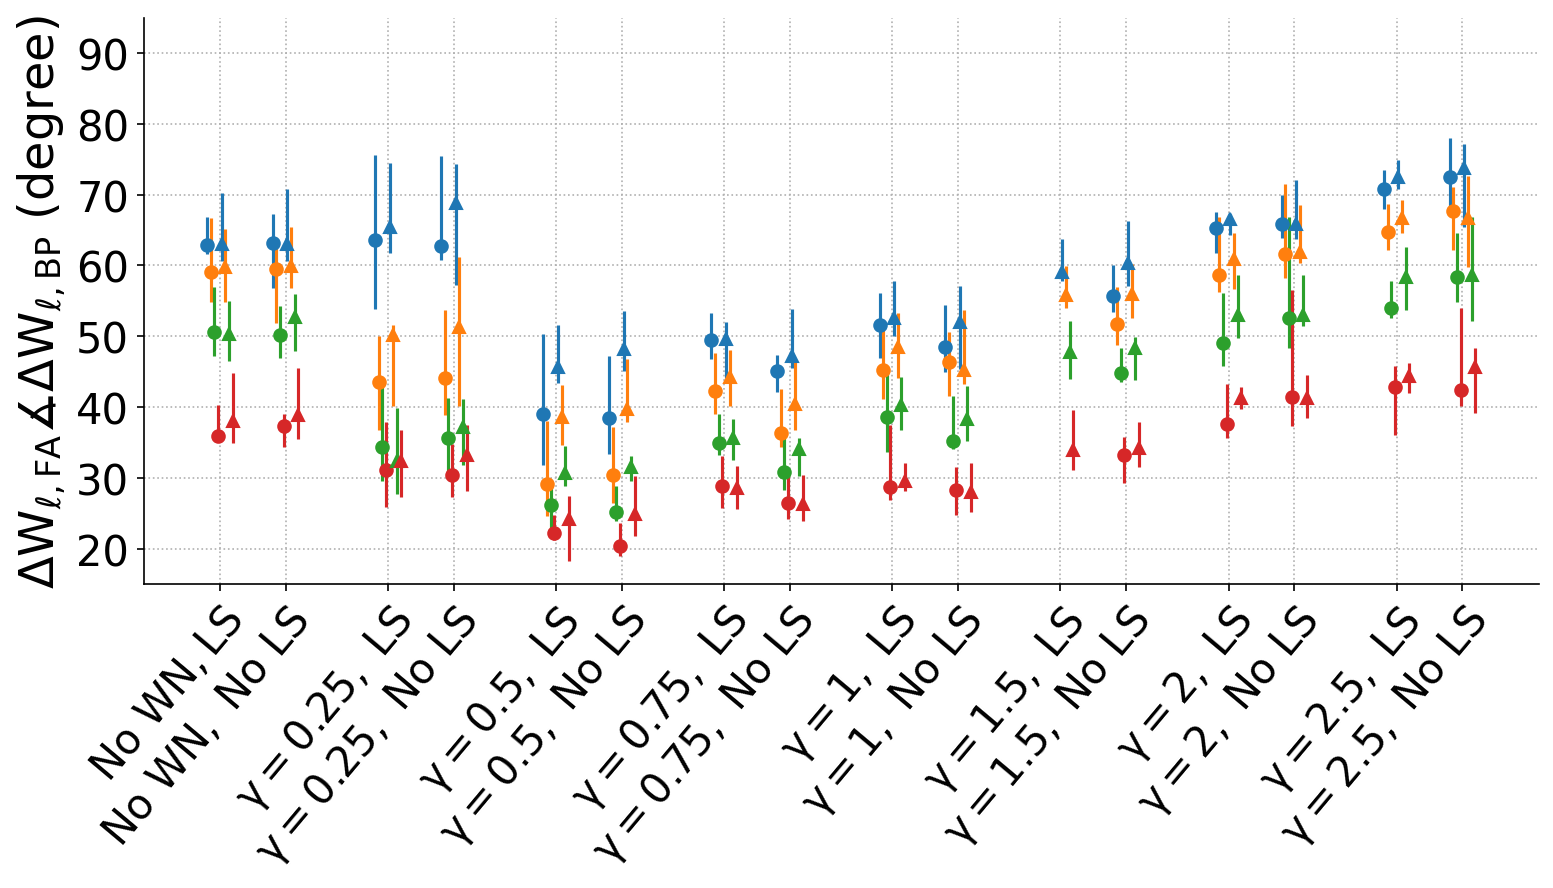

In [ ]:

plt_fontsize_label_ = 23



figsize_ = (12,5)
plt.figure(num = None, figsize=figsize_, dpi=150, facecolor='w', edgecolor='k')



  



tick_list = []






x_start=1
for exp_i in range(len(experiment_list_FA)):

  for ii in [0,1]:
    str1 = experiment_list_FA[exp_i][ii]
    str_directory = base_directory_data_str + str1 + "/angle_dW_BP_FA.txt"

    with open( str_directory , "rb") as fp:   #Pickling
      angle_W_B_list = pickle.load(fp)




    for l in range(0,4):


        median = angle_W_B_list[l,:,-11:].mean(dim=1).flatten().median()
        min1 = angle_W_B_list[l,:,-11:].mean(dim=1).flatten().min()
        max1 = angle_W_B_list[l,:,-11:].mean(dim=1).flatten().max()

        xerr_ = torch.zeros([2,1])
        xerr_[0,0] = - min1 + median
        xerr_[1,0] = max1 - median
    
        if ii in [0]:
          plt.errorbar(x_start, median , yerr= xerr_  , marker='o' , color = my_cycle[l])
        if ii in [1]:
          plt.errorbar(x_start, median , yerr= xerr_  , marker='^' , color = my_cycle[l])

        x_start = x_start + 1

  tick_list.append(x_start-3)  

  if exp_i%2 ==1 :
    x_start = x_start + 10

  x_start = x_start + 10








plt.ylabel(r"$\Delta W_{\ell ,FA} \measuredangle \Delta W_{\ell ,BP} \ (degree)$", fontsize= plt_fontsize_label_)




ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.xticks( np.array(tick_list) -1.5 , [r"$No\ WN,LS$" , r"$No\ WN,\ No\ LS$"
                  , r"$\gamma=0.25,\ LS$" , r"$\gamma=0.25,\ No \ LS$"
                  , r"$\gamma=0.5,\ LS$", r"$\gamma=0.5,\ No \ LS$"
                  , r"$\gamma=0.75,\ LS$" , r"$\gamma=0.75,\ No \ LS$"
                  , r"$\gamma=1,\ LS$"  , r"$\gamma=1,\ No \ LS$"
                  , r"$\gamma=1.5,\ LS$" , r"$\gamma=1.5,\ No \ LS$"
                  , r"$\gamma=2,\ LS$"  , r"$\gamma=2,\ No \ LS$"
                  , r"$\gamma=2.5,\ LS$"  , r"$\gamma=2.5,\ No \ LS$"
                         ], rotation=50 , ha='right' , rotation_mode="anchor" )
plt.yticks(list(range(20,95,10)))
plt.ylim(15,95)

plt.grid(linestyle=':')


plt.savefig( base_directory_figure_str +  'sesitivity_analysis_angle.jpg' , dpi=300 , bbox_inches='tight' ,  rotation_mode="anchor") 


plt.show()



# Plot sensitivity test error

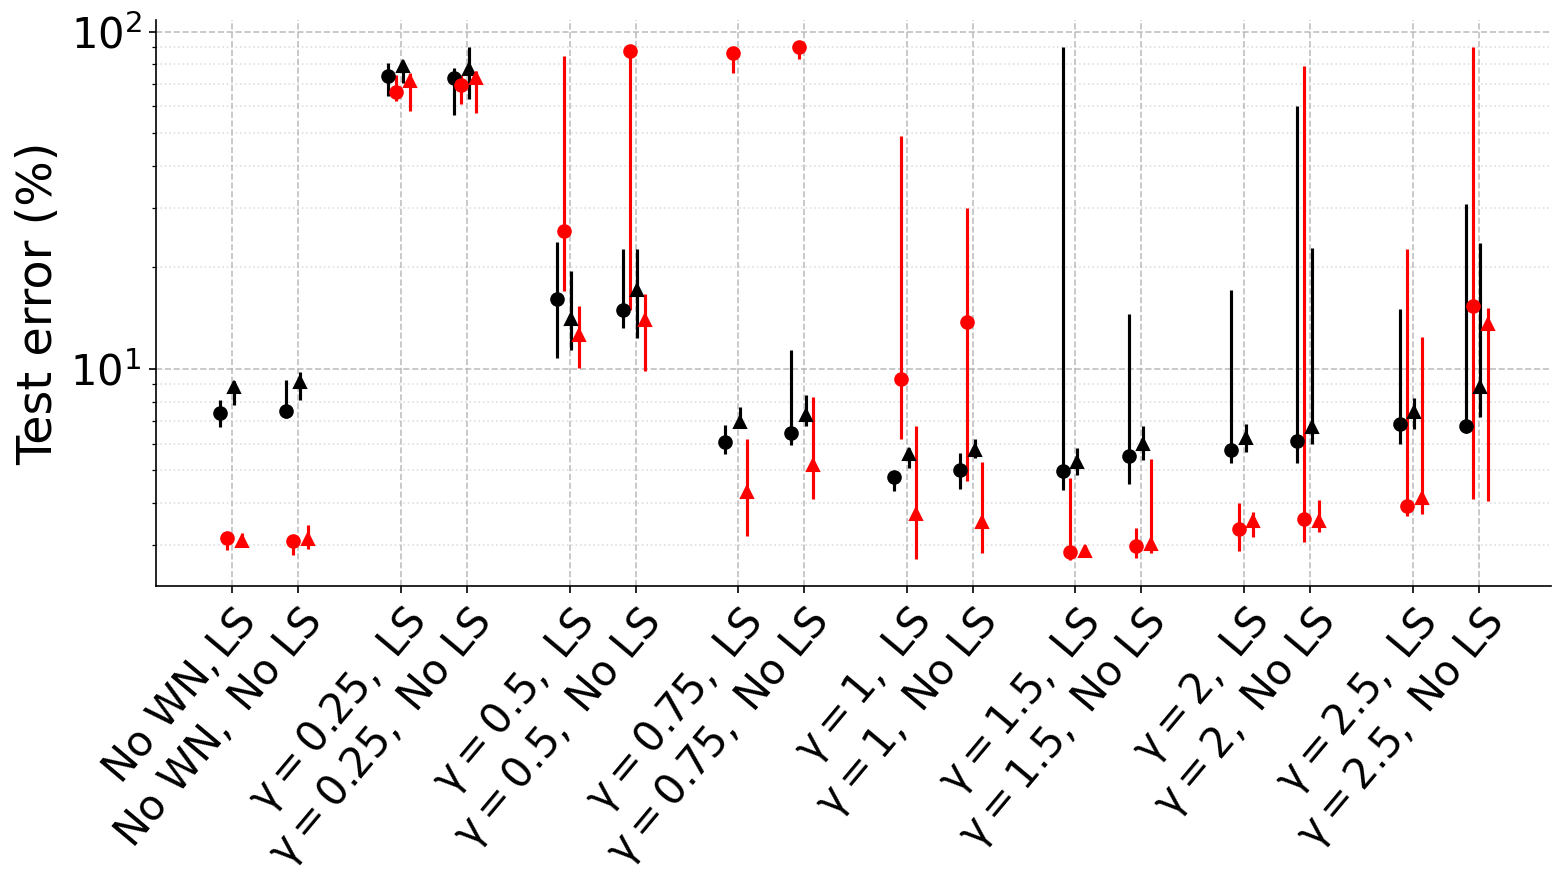

In [ ]:

plt_fontsize_label_ = 23



figsize_ = (12,5)
plt.figure(num = None, figsize=figsize_, dpi=150, facecolor='w', edgecolor='k')



  



tick_list = []



x_start=1
for exp_i in range(len(experiment_list_FA)):

  for ii in [0,1]:
    str1 = experiment_list_FA[exp_i][ii]
    str_directory = base_directory_data_str + str1 + "/test_accuracy_list_repeat.txt"

    with open( str_directory , "rb") as fp:   #Pickling
      test_accuracy_list = pickle.load(fp)







      median = 100-test_accuracy_list[:,-10:].mean(dim=1).flatten().median()
      min1 = 100-test_accuracy_list[:,-10:].mean(dim=1).flatten().min()
      max1 = 100-test_accuracy_list[:,-10:].mean(dim=1).flatten().max()

      xerr_ = torch.zeros([2,1])
      xerr_[0,0] = - min1 + median
      xerr_[1,0] = max1 - median
      # print(median)
      if ii in [0]:
        plt.errorbar(x_start, median , yerr= xerr_  , marker='o' , color = 'k')
      if ii in [1]:
        plt.errorbar(x_start, median , yerr= xerr_  , marker='^' , color = 'k')

      x_start = x_start + 2


    str1 = experiment_list_BP[exp_i][ii]
    str_directory = base_directory_data_str + str1 + "/test_accuracy_list_repeat.txt"

    with open( str_directory , "rb") as fp:   #Pickling
      test_accuracy_list = pickle.load(fp)







      median = 100-test_accuracy_list[:,-10:].mean(dim=1).flatten().median()
      min1 = 100-test_accuracy_list[:,-10:].mean(dim=1).flatten().min()
      max1 = 100-test_accuracy_list[:,-10:].mean(dim=1).flatten().max()

      xerr_ = torch.zeros([2,1])
      xerr_[0,0] = - min1 + median
      xerr_[1,0] = max1 - median
      # print(median)
      if ii in [0]:
        plt.errorbar(x_start, median , yerr= xerr_  , marker='o' , color = 'red')
      if ii in [1]:
        plt.errorbar(x_start, median , yerr= xerr_  , marker='^' , color = 'red')

      x_start = x_start + 2



  tick_list.append(x_start-6)  

  x_start = x_start + 10


  if exp_i%2 ==1 :
    x_start = x_start + 10



plt.ylabel(r"Test error (%)", fontsize= plt_fontsize_label_)


plt.yscale('log')
# leg = plt.legend( loc= 'lower left'  , fontsize = plt_fontsize_legend_ -3  )

# for line in leg.get_lines():
#     line.set_linewidth(3.0)
# plt.title(r"$\eta=0.0003$")
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)




plt.xticks( np.array(tick_list) +1.5 , [r"$No\ WN,LS$" , r"$No\ WN,\ No\ LS$"
                  , r"$\gamma=0.25,\ LS$" , r"$\gamma=0.25,\ No \ LS$"
                  , r"$\gamma=0.5,\ LS$", r"$\gamma=0.5,\ No \ LS$"
                  , r"$\gamma=0.75,\ LS$" , r"$\gamma=0.75,\ No \ LS$"
                  , r"$\gamma=1,\ LS$"  , r"$\gamma=1,\ No \ LS$"
                  , r"$\gamma=1.5,\ LS$" , r"$\gamma=1.5,\ No \ LS$"
                  , r"$\gamma=2,\ LS$"  , r"$\gamma=2,\ No \ LS$"
                  , r"$\gamma=2.5,\ LS$"  , r"$\gamma=2.5,\ No \ LS$"
                         ], rotation=50 , ha='right' , rotation_mode="anchor" )


# plt.yticks(list(range(20,95,10)))
# plt.ylim(20,95)
# plt.yticks(list(range(10,100,10)))
# plt.yticks(list(range(10,100,10)))

ax = plt.gca()
# Change major ticks to show every 20.
# ax.xaxis.set_major_locator(MultipleLocator(10))
# ax.yaxis.set_major_locator(MultipleLocator(10))

# Change minor ticks to show every 5. (20/4 = 5)
# ax.xaxis.set_minor_locator(AutoMinorLocator(5))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))

ax.grid(which='both')

ax.grid(which='major' , linestyle='--' , alpha=0.8)

ax.grid(which='minor',linestyle=':', alpha=0.4)

plt.savefig( base_directory_figure_str +  'sesitivity_analysis_error.jpg' , dpi=300 , bbox_inches='tight') 


plt.show()




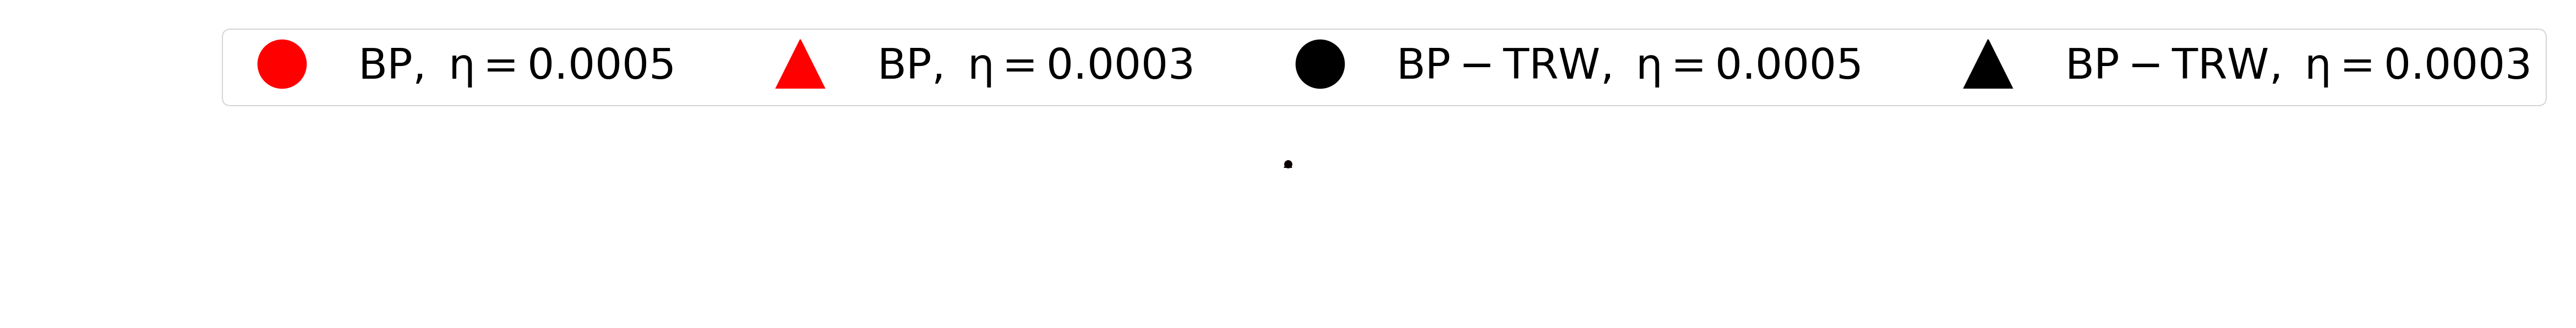

In [ ]:


def export_legend(legend, filename  , expand=[-40,-40,40,40]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi=300, bbox_inches=bbox)



my_cycle =  [u'#1f77b4'    , u'#ff7f0e'    , u'#2ca02c'   , u'#d62728'   , u'#7f7f7f'   , u'#17becf'     , u'#9467bd'    ,  u'#8c564b'    , u'#e377c2'  ,   u'#7f7f7f' ]
my_cycle2 = [u'#1f77b455'  , u'#ff7f0e55'  , u'#2ca02c55' , u'#d6272855' , u'#7f7f7f55' , u'#17becf55'   , u'#9467bd55'  ,  u'#8c564b55'  , u'#e377c2'  ,   u'#7f7f7f' ]





plt.figure(num = None, figsize=(40,5) , dpi=150, facecolor='w', edgecolor='k')



plt.plot( [0]    ,'o',  marker='o', label =  r"$BP,\ \eta=0.0005$"  , alpha = 1 , color='red') 

plt.plot( [0]   ,'^' , marker='^', label =  r"$BP,\ \eta=0.0003$" , alpha = 1 , color='red' ) 
plt.plot( [0]   , 'o' , marker='o', label = r"$BP-TRW,\ \eta=0.0005$", alpha =1 , color= 'k') 
plt.plot( [0]  ,'^' , marker='^', label =  r"$BP-TRW,\ \eta=0.0003$" , alpha = 1 , color='k') 





leg =  plt.legend(  fontsize = plt_fontsize_legend_ +10 , markerscale=7,ncol=6 )

for line in leg.get_lines():
    line.set_linewidth(9)

for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


plt.axis('off')
dir_str = base_directory_figure_str + "legend_test_error_sensitivity.jpg"
export_legend(leg  , filename= dir_str  )



plt.show()
